<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-for-HR/blob/main/Research%20of%20job%20postings%2C%20category%20Project%20Manager%20DA%2C%20ML%2C%20NLP/Var_2_Research_of_job_postings%2C_category_Project_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Описание проекта


*   Исследование проводилось для кадрового агентства, предоставившего данные по закрытию вакансий за период 2023 - начало 2024 года.
*   Предмет исследования: группа публикаций вакансий Project Manager/Менеджер проектов.  










###Цель проекта



*   Провести анализ опубликованных вакансий за 2023 год с целью подтверждения или опровержения гипотез относительно влияния определенных условий на вакансии
(перечень гипотез в приложении к ТЗ).
*   В случае обнаружения дополнительных условий, влияющих на отклик кандидатов, которые не были ранее учтены в исходных гипотезах, включить в проект их изложение.
*   В случае обнаружения дополнительных условий, влияющих на отклик кандидатов, которые не были ранее учтены в исходных гипотезах, включить в проект их изложение.







#### Описание данных (ТЗ)


*   **`id`** - Уникальный идентификатор вакансии
---
*   **`Статус`** - Статус вакансии. Категориальное значение. Возможные значения:
  *   **Архив** - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства
  *   **Закрыта нами** - вакансия закрыта, подходящая кандидатура найдена силами *   агентства;
  *   **Активна** - вакансия опубликована, идет активный поиск кандидатов;
  *   **На рассмотрении** - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
  *   **Отклонена** - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется;
  *   **Черновик** - вакансия в стадии заполнения.
---
*   **`Источник лида`** - Источник вакансии. Категориальное значение. Возможные значения:
  *   **Входящая заявка** - заказчик сам заполнил форму на сайте КА;
  *   **Сорсинг** - менеджеры КА привлекли заказчика исходящим поиском;
  *   **Повторная** - это не первая вакансия компании, подбор на которую будет делать КА;
  *   **Реферальная** - заказчик пришел в КА по рекомендации от другого заказчика.
---
*   **`Менеджер`** - Менеджер, ответственный за вакансию. Возможны пустые значения в связи с тем, что это поле сначала не существовало, потом было не обязательным к заполнению.
---
*   **`Дата публикации`** - Дата, когда вакансия была опубликована на сайте КА.
---
*   **`Дата закрытия`** - Дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии.
---
*   **`Количество просмотров`** - Количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию.
---
*  **`Количество откликов`** - Количество уникальных пользователей сайта, отправивших отклик на вакансию.
---
*   **`Позиция`** - Название вакансии
---
*   **`Зарплата от`** - Нижняя граница заработной платы для вакансии. Поля может быть пустым
---
*   **`Зарплата до`** - Верхняя граница заработной платы для вакансии. Поле может быть пустым.
---
*   **`Город`** - В каких городах предлагается работа вне зависимости от формата. Например, может быть указан город Москва - при этом занятость необязательно офисная, поэтому кандидат может находиться в другой локации.
---
*   **`Формат оформления`** - Какой формат оформления предлагает заказчик.
---
*   **`Формат работы`** - Какой формат работы предлагает заказчик.
---
*   **`Опыт`** - Какой опыт работы должен быть у соискателя.
---
*   **`Образования`** - Какое образование должно быть у соискателя.
---
*   **`Ссылка на тестовое`** - Есть ли ссылка на тестовое задание в описании вакансии.
---
*   **`Занятость`** - Какой формат занятости предлагает заказчик.
---
*   **`Обязательные требования`** - Какие обязательные требования предъявляет заказчик к кандидатам.
---
*   **`Дополнительный требования`** - Какие дополнительные требования предъявляет заказчик к кандидатам.
---
*   **`Этапы отбора`** - Этапы отбора на должность
---
*   **`Условия`** - Краткое текстовое описание условий вакансии. Может повторять информацию из других столбцов



##Импорты и инсталляции

In [2]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 842.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=22b293a0ef762cb50fe52b819a32049c3fcc10615d8401d1b64bad1d0cd3bd46
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [3]:
!pip install phik==0.10.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.4/599.4 kB 8.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import re

In [5]:
import numpy as np

In [6]:
from tqdm import notebook

In [7]:
import plotly.express as px

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date
import phik

In [9]:

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:

  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import names, stopwords, words

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:

from nltk.stem import WordNetLemmatizer


In [15]:
import torch

In [16]:
import pymorphy2


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from pymystem3 import Mystem
from joblib import Parallel, delayed

In [18]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


##Загрузка данных

####Загрузка датасета

In [19]:
df = pd.read_excel('/content/drive/MyDrive/Yandex for HR agency/data/vacancy_statistics_2023.xlsx', index_col=False)

#### Просмотр датасета

In [ ]:
df.sample(5) #5 rows

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1302 non-null   int64  
 1   Статус                     1302 non-null   object 
 2   Источник лида              1292 non-null   object 
 3   Менеджер                   1209 non-null   object 
 4   Дата публикации            1302 non-null   object 
 5   Дата закрытия              1144 non-null   object 
 6   Количество просмотров      1302 non-null   int64  
 7   Количество откликов        1302 non-null   int64  
 8   Компания                   1302 non-null   object 
 9   Позиция                    1302 non-null   object 
 10  Курсы ЯП                   1302 non-null   object 
 11  Зарплата от                476 non-null    float64
 12  Зарплата до                377 non-null    float64
 13  Город                      1302 non-null   objec

In [ ]:
# создадим пустые списки
columns = [] # наименования атрибутов
type_list = [] # типы данных
null_ratio = [] # доля пропусков
unique_cnt = [] # количество уникальных значений
unique_names = [] # уникальные значения

# циклом добавим значения в пустые списки
for i in df.columns:
    columns.append(i)
    type_list.append(df[i].dtypes)
    null_ratio.append(f'{(100 * df[i].isnull().sum()/len(df[i])):.2f}' + '%')
    unique_cnt.append(df[i].nunique())
    unique_names.append(df[i].unique())

# сохраним в датафрейм
unique_df = pd.DataFrame({'column_name' : columns,
                          'column_type' : type_list,
                          'null_ratio' : null_ratio,
                          'unique_cnt' : unique_cnt,
                          'unique_names' : unique_names})


unique_df

##Изменить Наблюдаемые возможности на основе данных и план работы

С точки зрения бизнес-логики, в датасете содержатся следующие группы данных:


*   Признаки вакансии, очевидные для кандидата (параметры публикации вакансии)
*   Данные о бизнес процессе, не очевидные для кандидата



**Параметры вакансии, которые видит кандидат** (звездочкой я отметила те, которые могут быть параметрами поискового запроса кандидата)
*   Дата публикации            *
*   Зарплата от                *
*   Зарплата до                *
*   Город                      *
*   Формат оформления          *
*   Формат работы              *
*   Опыт                       *
*   Образование                *
*   Занятость                  *
*   Ссылка на тестовое
*   Обязательные требования
*   Дополнительный требования
*   Условия

также не искючено что кандидат видит Id вакансии, но это не существенный для него признак

**Признаки бизнес-процесса, которые кандидат не видит** (зведочкой отмечены первичные метрики активности кандидата)


*   Статус
*   Источник лида
*   Менеджер
*   Дата закрытия
*   Количество просмотров *
*   Количество откликов *
*   Этапы отбора




В качестве основной цели исследования я выбрала **изучение закономерностей реакций кандидатов на публикацию вакансии**, другие данные по бизнес-процессам не вошли в это исследование.




##Предобработка данных




In [23]:
#создадим резервную копию
dr=df.copy

####Переименование колонок

In [24]:
#
df=df.rename(columns={'Статус':'status', 'Источник лида':'lead_source', 'Менеджер':'manager', 'Дата публикации':'start_date', 'Дата закрытия':'end_date', 'Количество просмотров':'views',
'Количество откликов':'responses', 'Компания':'emp_brand',  'Позиция':'job_title', 'Курсы ЯП':'courses','Зарплата от':'salary_min', 'Зарплата до':'salary_max', 'Город':'city', 'Формат оформления':'contract', 'Формат работы':'format', 'Опыт':'experience', 'Образование':'education', 'Занятость':'employment', 'Ссылка на тестовое':'test_task', 'Обязательные требования':'mandatory', 'Дополнительный требования':'additional', 'Этапы отбора':'comр_stages', 'Условия':'work_conditions'
})
#})

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1302 non-null   int64  
 1   status           1302 non-null   object 
 2   lead_source      1292 non-null   object 
 3   manager          1209 non-null   object 
 4   start_date       1302 non-null   object 
 5   end_date         1144 non-null   object 
 6   views            1302 non-null   int64  
 7   responses        1302 non-null   int64  
 8   emp_brand        1302 non-null   object 
 9   job_title        1302 non-null   object 
 10  courses          1302 non-null   object 
 11  salary_min       476 non-null    float64
 12  salary_max       377 non-null    float64
 13  city             1302 non-null   object 
 14  contract         1302 non-null   object 
 15  format           1302 non-null   object 
 16  experience       1302 non-null   object 
 17  education     

In [26]:
print (df.duplicated().sum())

0


##Исследовательский анализ данных (EDA)

###Подробное знакомство с данными

In [27]:
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений: ',dataset[column].nunique())  #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитает количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [ ]:
#передадим для анализа наш датасет
dataset_info(df)

### Расчет дополнительных признаков и категорий

In [29]:
dteda=df.copy() #скупируем отдельный датасет для выполнения этих исследований

Основными первичными метриками интереса кандидатов к вакансии являются количество просмотров и откликов. Посмотрим, нормально ли распределены признаки.

In [30]:
# Создадим функцию, которая будет строить столбчатую диаграмму
def function_seaborn(table, x, y, ytitle):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.barplot(x = x, y=y,
                 data = table.sort_values(by=y, ascending=False), palette=sns.color_palette("Set2"))
    plt.ylabel(f'{ytitle}')
    plt.xlabel(f'{x}')
    plt.title(f'Столбчатая диаграмма распределения {x}')
    plt.xticks(rotation=45)
    plt.show();

In [31]:
fig = px.histogram(dteda,
                     x= 'responses',
                     marginal = 'box',
                     title='Гистограмма распределения количества откликов')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Количество откликов')
fig.show()

In [32]:
fig = px.histogram(dteda,
                     x= 'views',
                     marginal = 'box',
                     title='Гистограмма распределения количества просмотров')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Количество просмотров')
fig.show()

**Выводы:** распределение этих двух признаков похоже на нормальное (смещенное). с учетом того что датасет небольшой и других метрик нет, будем оперировать с этими как с данными, имеющими нормальное распределение.

In [33]:
print(dteda['views'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['views'].max())
print(dteda['views'].median())
print(dteda['views'].mean())

1
317
30.0
40.35867895545315


In [34]:
print(dteda['responses'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['responses'].max())
print(dteda['responses'].median())
print(dteda['responses'].mean())

1
151
8.0
11.560675883256529


Такие данные позволяют посчитать производную метрику - конверсию, которая будет основной метриков в данном исследовании. Она отражает долю кандидатов, отликнувшихся на вакансию после ознакомления с ней (от 0 до 1)

In [35]:
dteda['conv']= dteda['responses']/ dteda['views']

In [36]:
fig = px.histogram(dteda,
                     x= 'conv',
                     marginal = 'box',
                     title='Гистограмма распределения метрики конверсии')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Конверсия')
fig.show()

In [37]:
print(dteda['conv'].min())#убедимся что нет нулей и определим примерный центр распределения
print(dteda['conv'].max())
print(dteda['conv'].median())
print(dteda['conv'].mean())

0.011111111111111112
1.0
0.30176520033622867
0.33741852111950965


Анализ распределения этой метрики - нормальное, медиана и среднее близко, очень удачно и можно дальше опираться на статистику, сделанную на основе это метрики

А в качестве гуманитарного вывода можно сказать, что в среднем одна треть прочитавших описание вакансии откликается на нее.


#### Разделение по категориям


Возьмем вариант предложенный для "ручного" разделения на категории. "Вручную" пишется алгоритм: по каким признакам будем определять категорию вакансий. Дальше в работе будет сравнение с разделением на категории с помощью алгоритмов машинного обучения.

In [38]:
dteda['job_title'] = dteda['job_title'].str.lower()
dteda['job_title'] = dteda['job_title'] .str.replace('ё', 'е')

In [39]:
dteda['job_cat'] = None
dteda.loc[(dteda['job_title'].str.contains('разработ', case=False))\
           |(dteda['job_title'].str.contains('developer',case=False))\
           |(dteda['job_title'].str.contains('программист',case=False)), 'job_cat'] = 'Разработка'

dteda.loc[(dteda['job_title'].str.contains('devops', case=False)), 'job_cat'] = 'DevOps'


#в фокусе исследования
dteda.loc[(dteda['job_title'].str.contains('менеджер', case=False))\
           |(dteda['job_title'].str.contains('manager',case=False))\
           |(dteda['job_title'].str.contains('руководитель',case=False))\
           |(dteda['job_title'].str.contains('project',case=False))\
           |(dteda['job_title'].str.contains('pm',case=False))\
           |(dteda['job_title'].str.contains('администратор',case=False))\
           |(dteda['job_title'].str.contains('проектов',case=False))\
           |(dteda['job_title'].str.contains('проекта',case=False)), 'job_cat'] = 'PM'

dteda.loc[(dteda['job_title'].str.contains('account', case=False))\
           |(dteda['job_title'].str.contains('аккаунт', case=False))\
           |(dteda['job_title'].str.contains('product', case=False))\
           |(dteda['job_title'].str.contains('продукт', case=False))\
           |(dteda['job_title'].str.contains('трафик',case=False))\
           |(dteda['job_title'].str.contains('посев',case=False))\
           |(dteda['job_title'].str.contains('sales',case=True))\
           |(dteda['job_title'].str.contains('commer',case=True))\
           |(dteda['job_title'].str.contains('трансак',case=True))\
           |(dteda['job_title'].str.contains('агент',case=True))\
           |(dteda['job_title'].str.contains('продакт',case=True))\
           |(dteda['job_title'].str.contains('продаж',case=False)), 'job_cat'] = 'Менеджмент other'

dteda.loc[(dteda['job_title'].str.contains('аналитик', case=False))\
          |(dteda['job_title'].str.contains('data',case=False))\
          |(dteda['job_title'].str.contains('дата',case=False))\
          |(dteda['job_title'].str.contains('данны',case=False))\
          |(dteda['job_title'].str.contains(' ml ',case=True))\
          |(dteda['job_title'].str.contains('систем',case=True))\
          |(dteda['job_title'].str.contains('nlp',case=True))\
          |(dteda['job_title'].str.contains('analyst',case=False)), 'job_cat'] = 'Аналитика'

dteda.loc[(dteda['job_title'].str.contains('тест', case=False))\
           |(dteda['job_title'].str.contains('qa',case=False))\
           |(dteda['job_title'].str.contains('качест',case=False)), 'job_cat'] = 'Тестирование'

dteda.loc[(dteda['job_title'].str.contains('дизайн', case=False))\
           |(dteda['job_title'].str.contains('design',case=False)), 'job_cat'] = 'Дизайн'

dteda.loc[(dteda['job_title'].str.contains('таргет', case=False))\
           |(dteda['job_title'].str.contains('директ',case=False))\
           |(dteda['job_title'].str.contains('маркет', case=False))\
           |(dteda['job_title'].str.contains('контекст', case=False))\
           |(dteda['job_title'].str.contains('партнер', case=False))\
           |(dteda['job_title'].str.contains('marketing', case=False))\
           |(dteda['job_title'].str.contains(' pr ', case=False))\
           |(dteda['job_title'].str.contains('контент', case=False))\
           |(dteda['job_title'].str.contains('seo', case=False))\
           |(dteda['job_title'].str.contains('smm', case=False)), 'job_cat'] = 'Маркетинг'

dteda.loc[(dteda['job_title'].str.contains('поддерж', case=False))\
            |(dteda['job_title'].str.contains('забот',case=False)), 'job_cat'] = 'Техподдержка'

dteda.loc[(dteda['job_title'].str.contains('рекрутер', case=False))\
           |(dteda['job_title'].str.contains('recruiter',case=False))\
           |(dteda['job_title'].str.contains('ресечер',case=False))\
           |(dteda['job_title'].str.contains('рисерчер',case=False))\
           |(dteda['job_title'].str.contains('персонал',case=False))\
           |(dteda['job_title'].str.contains('карьер',case=False))\
           |(dteda['job_title'].str.contains('hr',case=False))\
           |(dteda['job_title'].str.contains('career',case=False))\
           |(dteda['job_title'].str.contains('сорсер',case=False)), 'job_cat'] = 'HR'

dteda['job_cat'] = dteda['job_cat'].fillna('Другое')

In [40]:
# dteda

In [41]:
fig = px.histogram(dteda,
                     x= 'job_cat',
                     histnorm='percent',
                     title='Распределение названий вакансий по категориям, алгоритм классификации составлен человеком ',
                     text_auto = True)
fig.update_layout(yaxis_title_text = '% вакансий этой категории',
                  xaxis_title_text = 'Категория',
                  xaxis = {"categoryorder":"total descending"})
fig.update_traces(texttemplate='%{y:.2f}%')
fig.show()

**Итоги** в датасет добавлены 2 новых признака: конверсия (просмотров в отклики) и категория вакансии.

In [42]:
dteda.query('job_cat == "PM"')['job_title'].sample(60)

818                                       project manager
230                                    it project manager
752                                       project manager
51                                        project manager
981                             младший менеджер проектов
783                                  менеджер it проектов
345                            project менеджер (digital)
606                                    проектный менеджер
1290                    стажировка для project менеджеров
1137                                    менеджер проектов
566                                       project manager
485                                    it project manager
78                                     проектный менеджер
725                                       project manager
696                                junior project manager
217                          ассистент менеджера проектов
347                           менеджер проектов в digital
968           

In [43]:
pmdata=dteda.query('job_cat == "PM"')

In [44]:
dteda.query('job_cat == "Менеджмент other"')['job_title'].sample(30)

1233                           стажировка product manager
584                               project/product manager
474                             проджект/продакт менеджер
900                                       product manager
660                                       трафик-менеджер
962                                product manager middle
1300                                      product manager
1265                                    менеджер продукта
979                                       product manager
784                                стажер product manager
901                                       трафик-менеджер
494                 младший менеджер продукта support&ops
562                               junior account менеджер
611                              трафик-менеджер (junior)
95                  практикант менеджер проектов в трафик
383                                стажер account manager
571                              трафик-менеджер (junior)
1262          

In [45]:
dteda.query('job_cat == "Другое"')['job_title'].sample(30)

776                                         golang стажер
357                                  технический писатель
803     ведущий консультант отдела мониторинга экономи...
468                                           java intern
775                                       фронтенд стажер
907                                           координатор
1225                                          верстальщик
774                                  web-dev | mobile-dev
1249             оплачиваемая стажировка в veles research
465                                      html-верстальщик
1202                      оплачиваемая стажировка в mtech
483                                 https://ertelecom.ru/
1256                 неоплачиваемая стажировка для python
229                                          junior ux/ui
291                  фронтендер в команду николая иронова
778                            стажировка ux-исследования
1150       оплачиваемая стажировка в правительстве москвы
303           

In [46]:
df_pm = pd.DataFrame(data=pmdata) #сохраняем все данные по вакансии PM как отдельный датасет

### Исследование статистических закономерностей



#### Средние показатели просмотров по категориям



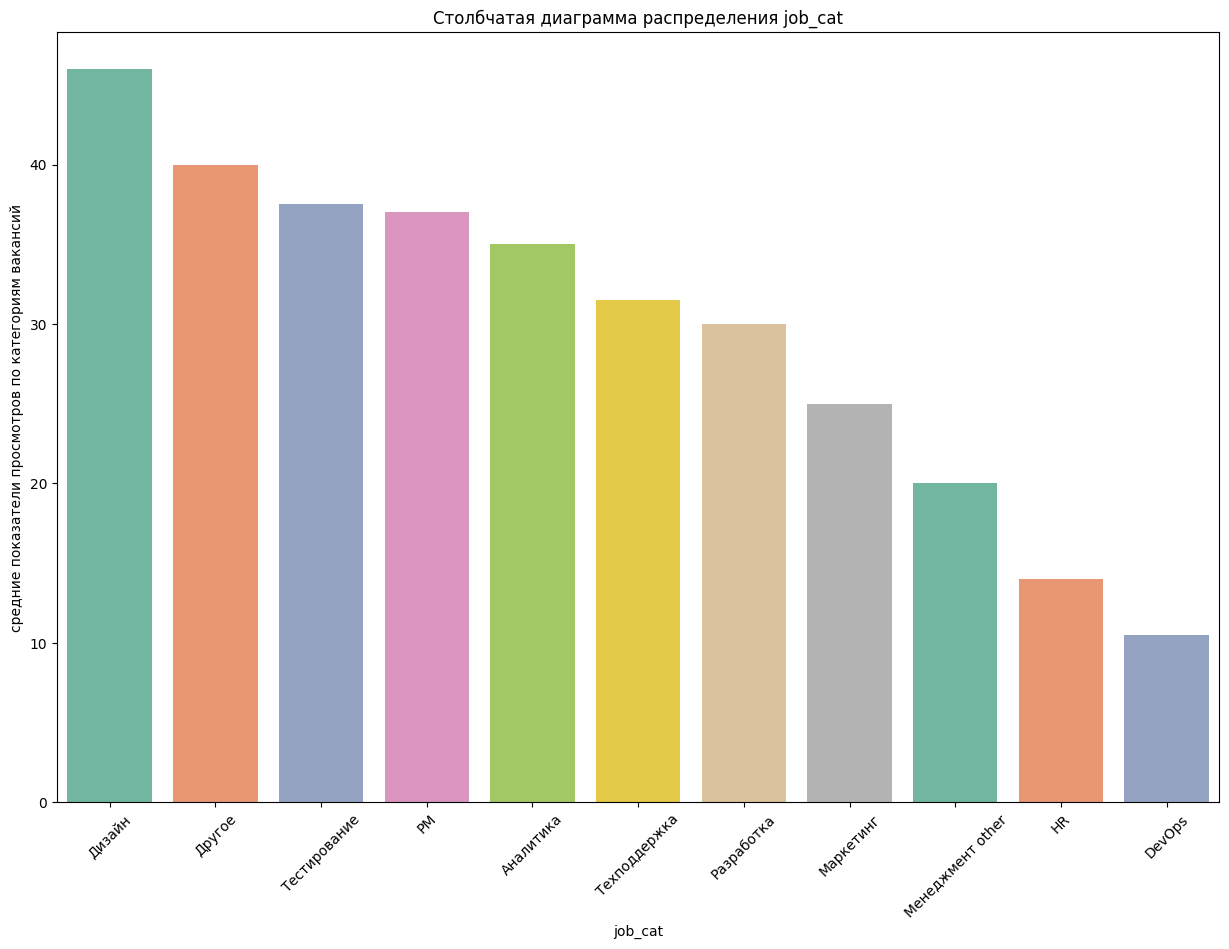

In [47]:
response = dteda.pivot_table(index='job_cat',
                                 values='views',
                                 aggfunc='median').reset_index()

function_seaborn(table=response, x='job_cat', y='views', ytitle='средние показатели просмотров по категориям вакансий')

Самые высокие средние показатели просмотра по категориям вакансий - в категории "Дизайн". Присутствие этой категории по количеству вакансий - менее 6%. Очевиден дефицит предложения в этой категории.

#### Конверсия просмотров в отклики по категориям

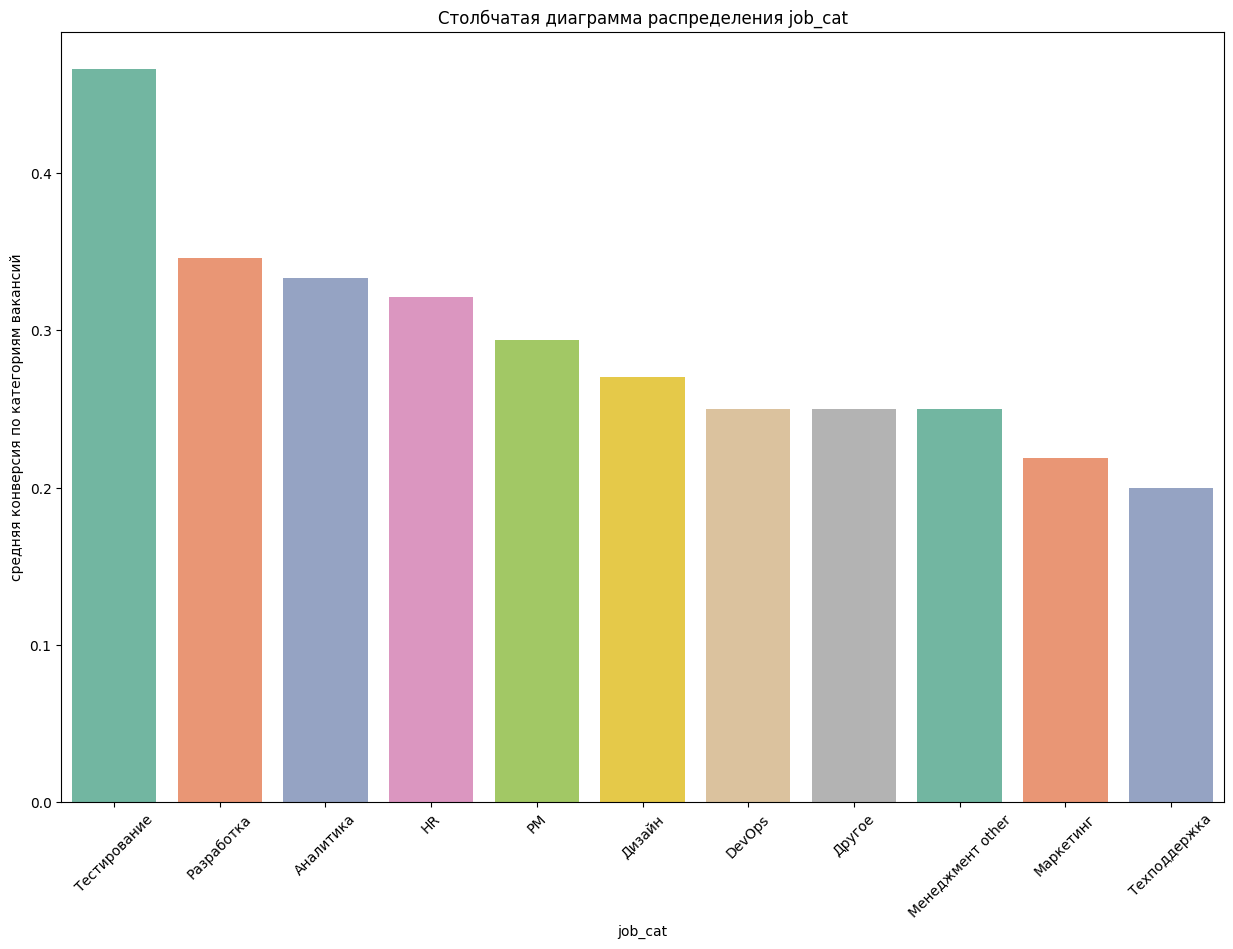

In [48]:
response = dteda.pivot_table(index='job_cat',
                                 values='conv',
                                 aggfunc='median').reset_index()

function_seaborn(table=response, x='job_cat', y='conv', ytitle='средняя конверсия по категориям вакансий')

Примечательно, что внутри IT очень существенные различия по отзывчивости кандидатов. Тестировщики откликаются в почти в половине случаев, техподдержка - почти в 2 раза реже.

#Особенности вакансий в разделе Project Manager


## Описание данных

In [49]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 6 to 1290
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               147 non-null    int64  
 1   status           147 non-null    object 
 2   lead_source      145 non-null    object 
 3   manager          143 non-null    object 
 4   start_date       147 non-null    object 
 5   end_date         138 non-null    object 
 6   views            147 non-null    int64  
 7   responses        147 non-null    int64  
 8   emp_brand        147 non-null    object 
 9   job_title        147 non-null    object 
 10  courses          147 non-null    object 
 11  salary_min       69 non-null     float64
 12  salary_max       58 non-null     float64
 13  city             147 non-null    object 
 14  contract         147 non-null    object 
 15  format           147 non-null    object 
 16  experience       147 non-null    object 
 17  education      

In [ ]:
dataset_info(df_pm)

##Исследовательский аналаз данных

Посмотрим как распределен признак "конверсия" у этой категории вакансий

In [51]:
fig = px.histogram(df_pm,
                     x= 'conv',
                     marginal = 'box',
                     title='Гистограмма распределения метрики конверсии')
fig.update_layout(yaxis_title_text = 'Количество вакансий',
                  xaxis_title_text = 'Конверсия')
fig.show()

Датасет маленький, поэтому гистограмма получается ступенчатой, контуры отдаленно напоминают нормальное распределение и есть намек на то, что нужно присмотреться с случаям 100% конверсией, что дальше обязательно сделаем.

In [52]:
df_pm['conv'].describe()

count    147.000000
mean       0.321479
std        0.194386
min        0.023256
25%        0.200000
50%        0.294118
75%        0.410428
max        1.000000
Name: conv, dtype: float64

#####Анализ показателей конверсии, определение уровней

**Выводы** Медиана и среднее близко, почти совпадают, возьмем медиану.  

In [53]:
print('показатели конверсии в этой группе вакансий')
print("очень низкий уровень: менее ",df_pm['conv'].quantile(1/4).round(2))
print("низкий уровень: oт ",df_pm['conv'].quantile(1/4).round(2), "до", df_pm['conv'].quantile(1/3).round(2))
print("ниже среднего: oт ",df_pm['conv'].quantile(1/3).round(2), "до", df_pm['conv'].quantile(1/2).round(2))
print("средний уровень: oт ",df_pm['conv'].quantile(1/2).round(2), "до", df_pm['conv'].mean().round(2))
print("выше среднего: oт ",df_pm['conv'].mean().round(2), "до", df_pm['conv'].quantile(2/3).round(2))
print("высокий: oт ",df_pm['conv'].quantile(2/3).round(2), "до", df_pm['conv'].quantile(3/4).round(2))
print("очень высокий: более ",df_pm['conv'].quantile(3/4).round(2))

показатели конверсии в этой группе вакансий
очень низкий уровень: менее  0.2
низкий уровень: oт  0.2 до 0.22
ниже среднего: oт  0.22 до 0.29
средний уровень: oт  0.29 до 0.32
выше среднего: oт  0.32 до 0.35
высокий: oт  0.35 до 0.41
очень высокий: более  0.41


Создадим новый столбец, показывающий привлекательность вакансии ('attractive') в зависимости от конверсии.
Введем три категории:

*   **Низкая привлекательность**,включает низкий и очень низкий уровень (low)
*   **Средняя привлекательность** средний уровень и вокруг среднего (middle)
*   **Высокая привлекательность**, включает высокий и очень высокий уровень конверсии)(high)


Разделим столбец с конверсией на три части с помощью квантилей.

In [54]:
# Определение квантилей для разбиения на категории
low_quantile = df_pm['conv'].quantile(1/3)
high_quantile = df_pm['conv'].quantile(2/3)

display(low_quantile)
high_quantile

0.221677559912854

0.35093167701863337

In [55]:
def categorize_popularity(param):
    # Определение категории популярности
    if param <= low_quantile:
        return "low"
    elif param <= high_quantile:
        return "middle"
    else:
        return "high"

# Применение функции к столбцу "conv" и создание нового столбца с категориями "attractive"
df_pm['attractive'] = df_pm['conv'].apply(categorize_popularity)

Добавим столбец, в котором объединим все текстовые описания вакансии

In [56]:
df_pm['additional']= df_pm['additional'].fillna('или')
#датасет и так невелик, поэтому нашла выход чем нейтральным заполнить пропуски в "additional"

In [57]:
df_pm['language'] = df_pm['mandatory']+df_pm['work_conditions']+df_pm['job_title']+df_pm['additional']


In [ ]:
df_pm

Проверим выбросы по признаку конверсия = 100%

In [59]:
strange_vac = df_pm[df_pm['conv'] == 1]

In [60]:
strange_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 171 to 1151
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5 non-null      int64  
 1   status           5 non-null      object 
 2   lead_source      5 non-null      object 
 3   manager          5 non-null      object 
 4   start_date       5 non-null      object 
 5   end_date         5 non-null      object 
 6   views            5 non-null      int64  
 7   responses        5 non-null      int64  
 8   emp_brand        5 non-null      object 
 9   job_title        5 non-null      object 
 10  courses          5 non-null      object 
 11  salary_min       4 non-null      float64
 12  salary_max       2 non-null      float64
 13  city             5 non-null      object 
 14  contract         5 non-null      object 
 15  format           5 non-null      object 
 16  experience       5 non-null      object 
 17  education      

In [ ]:
strange_vac.sample(5)

Это архивные вакансии с минимальным количеством просмотров

##Проверка гипотез

In [62]:
df_hy=df_pm.copy()

In [63]:
# функция для добавления столбца по условию в нужное место ДФ

# new_col - название нового столбца
# new - столбец, в значениях которого проводим поиск
# str - условие для фильтрации
# т - позиция, на которую нужно вставить новый столбец


def columns_contains(df, new_col, col, str, n):
    df[new_col] =  df[col].str.contains(str, na=False)
    df.insert(n, new_col, df.pop(new_col))



#### Гипотезы 1 о влиянии признаков наименований (Junior, Junior+ итд.)

In [64]:
columns_contains(df_hy, 'Junior_all', 'language', 'junior', 28)

In [65]:
columns_contains(df_hy, 'Junior_tag', 'job_title', 'junior', 29)

In [66]:
columns_contains(df_hy, 'Middle_tag', 'job_title', 'middle', 30)

In [67]:
columns_contains(df_hy, 'Middle_all', 'language', 'middle', 31)

In [68]:
columns_contains(df_hy, 'Senior_tag', 'job_title', 'senior', 32)

In [69]:
columns_contains(df_hy, 'Senior_all', 'language', 'senior', 32)

In [70]:
junior_list = [ 'младш','jun','джун','начинающ','джун']

In [71]:
df_hy['junior_list'] = df_hy['language'].str.contains('|'.join(junior_list), na=False)
df_hy.insert(10, 'junior_list', df_hy.pop('junior_list'))


In [72]:
df_hy['Senior_all'].unique().tolist()

[False]

In [73]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['junior_list', 'Junior_tag', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


In [74]:
good_title =['project manager junior', 'cтажер project manager', 'помощник руководителя проекта','руководитель проекта', 'менеджер проекта', 'координатор проекта',
             'менеджер it проектов', 'рroject manager middle']

In [75]:
df_hy['good_title'] = df_hy['job_title'].str.contains('|'.join(good_title), na=False)
df_hy.insert(11, 'good_title', df_hy.pop('good_title'))


In [76]:
df_hy['good_title'].unique().tolist()

[False, True]

In [77]:
df_hy['good_title'].unique().tolist()

[False, True]

In [78]:
bad_title =['senior ', 'тимлидер команды', 'тимлид','cкрам-мастер', 'scrum']

In [79]:
df_hy['bad_title'] = df_hy['job_title'].str.contains('|'.join(bad_title), na=False)
df_hy.insert(12, 'bad_title', df_hy.pop('bad_title'))


In [80]:
df_hy['bad_title'].unique().tolist()

[False]

Плохих примеров в названиях вакансий в нашем датасете нет

In [ ]:
df_hy

interval columns not set, guessing: ['conv', 'views', 'responses']


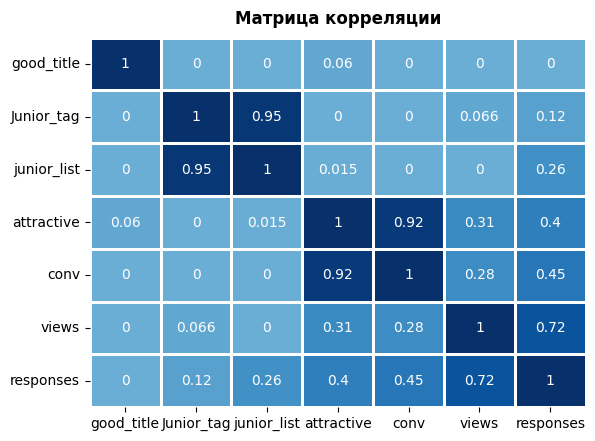

In [82]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_title', 'Junior_tag', 'junior_list','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

**Выводы по группе гипотез 1.1- 1.4** Для проверки гипотезы про middle и senior в датасете данных нет, по Junior статистически значимых связей не наблюдается.

#### Гипотеза 2 о признаке "стажировка"

In [83]:
trainee_list = [ 'trainee','стажер','стажиров','практикант', 'intern']

In [84]:
df_hy['trainee_list'] = df_hy['language'].str.contains('|'.join(trainee_list), na=False)
df_hy.insert(31, 'trainee_list', df_hy.pop('trainee_list'))


In [85]:
df_hy['trainee_tag'] = df_hy['job_title'].str.contains('|'.join(trainee_list), na=False)
df_hy.insert(32, 'trainee_tag', df_hy.pop('trainee_tag'))


In [ ]:
df_hy

interval columns not set, guessing: ['conv', 'views', 'responses']


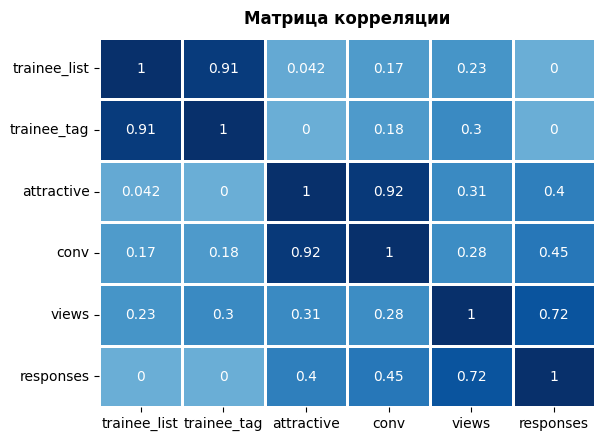

In [87]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['trainee_list', 'trainee_tag', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

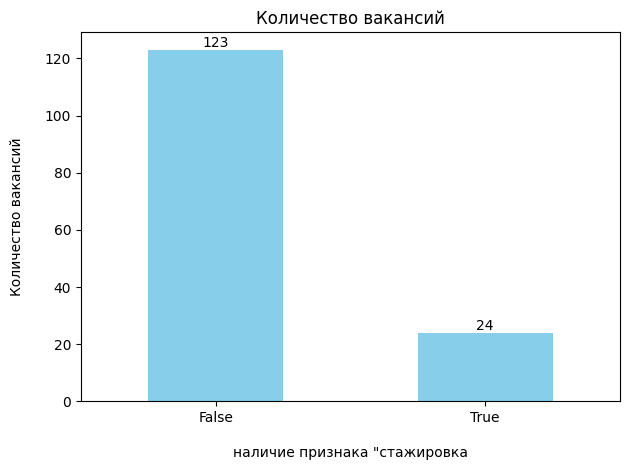

In [88]:


features_counts = df_hy['trainee_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "стажировка', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотеза о признаках методологии управления проектами  3.1

In [89]:
agile_list = [ 'agile','scrum','kanban','waterfall','брифинг', 'daily', 'meet','backlog','бэклог','релиз', 'release']

In [90]:
method_list = [ 'scrum','kanban','waterfall','брифинг', 'daily', 'meet','backlog','бэклог','релиз', 'release']

In [91]:
df_hy['agile_list'] = df_hy['language'].str.contains('|'.join(agile_list), na=False)
df_hy.insert(33, 'agile_list', df_hy.pop('agile_list'))


In [92]:
df_hy['method_list'] = df_hy['language'].str.contains('|'.join(method_list), na=False)
df_hy.insert(34, 'method_list', df_hy.pop('method_list'))


interval columns not set, guessing: ['conv', 'views', 'responses']


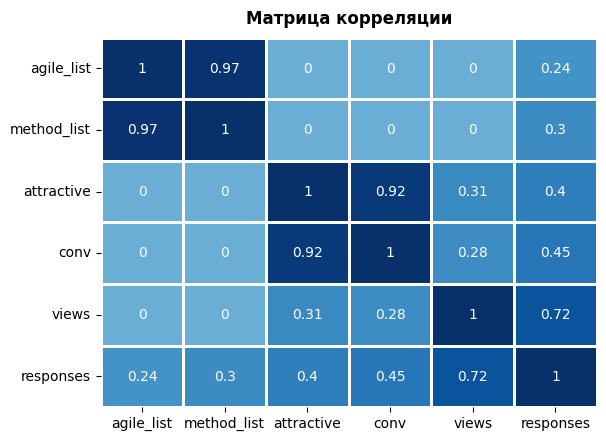

In [93]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['agile_list', 'method_list', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

**Выводы** тенденция не противоречит гипотезе, но связь слабая

#### Гипотезы 4: технологии. ПО

In [94]:
good_list_all = [ 'microsoft office', 'google docs', 'notion', 'miro', 'confluence','trello','exсel', 'яндекс. метрика', 'google analytics','gantpro', 'kaiten', 'jira', 'figma', 'agile','scrum','kanban']

In [95]:
bad_list_all = ['crm', 'битрикс24', 'bitrix24', 'activecollab', 'яндекс директ', 'sql', 'powerbi', 'illustrator']

In [96]:
df_hy['good_list_all'] = df_hy['language'].str.contains('|'.join(good_list_all), na=False)
df_hy.insert(35, 'good_list_all', df_hy.pop('good_list_all'))


In [97]:
df_hy['bad_list_all'] = df_hy['language'].str.contains('|'.join(bad_list_all), na=False)
df_hy.insert(36, 'bad_list_all', df_hy.pop('bad_list_all'))


In [98]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_list_all', 'bad_list_all', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


**Выводы** Влияние хорошего списка на отклики и конверсию выше, чем плохого, но в целом слабое.
**Загадка** У "плохого списка" корреляция с высокими просмотрами. Вероятно, какой-то сильный бренд работодателя дает объявления с этим неудобным стеком, их смотрят хорошо, но не откликаются. Если успею - посомотрю подробнее.

Попробуем убрать из списков софт, который более общего назначения (MS office, excel) и оставить специфичный и добавить возможные варианты написания  

In [99]:
good_list_short = [ 'notion', 'miro', 'confluence','trello', 'google analytics','gantpro', 'kaiten', 'jira', 'figma', 'agile','scrum','kanban']

In [100]:
bad_list_short = ['crm', 'битрикс24', 'bitrix24', 'activecollab', 'sql', 'powerbi', 'illustrator']

In [101]:
df_hy['good_list_short'] = df_hy['language'].str.contains('|'.join(good_list_short), na=False)
df_hy.insert(38, 'good_list_short', df_hy.pop('good_list_short'))


In [102]:
df_hy['bad_list_short'] = df_hy['language'].str.contains('|'.join(bad_list_short), na=False)
df_hy.insert(38, 'bad_list_short', df_hy.pop('bad_list_short'))


interval columns not set, guessing: ['conv', 'views', 'responses']


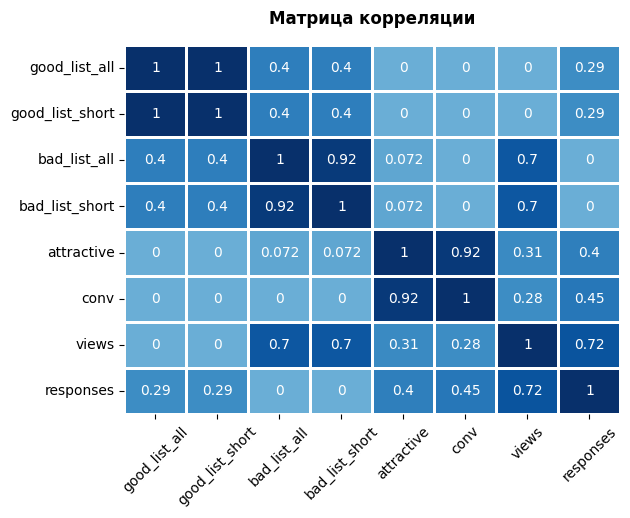

In [103]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['good_list_all', 'good_list_short', 'bad_list_all', 'bad_list_short','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [104]:
sql_list = ['sql']

In [105]:
df_hy['sql_list'] = df_hy['language'].str.contains('|'.join(sql_list), na=False)
df_hy.insert(39, 'sql_list', df_hy.pop('sql_list'))


In [106]:
df_hy['sql_list'].unique().tolist()

[False]

In [107]:
crm_list = ['crm']

In [108]:
df_hy['crm_list'] = df_hy['language'].str.contains('|'.join(crm_list), na=False)
df_hy.insert(40, 'crm_list', df_hy.pop('crm_list'))


In [109]:
df_hy['crm_list'].unique().tolist()

[False, True]

In [110]:
bad_list_new = ['битрикс24', 'bitrix24', 'activecollab', 'sql', 'powerbi', 'illustrator']

In [111]:
df_hy['bad_list_new'] = df_hy['language'].str.contains('|'.join(bad_list_new), na=False)
df_hy.insert(41, 'bad_list_new', df_hy.pop('bad_list_new'))


In [112]:
df_hy['bad_list_new'].unique().tolist()

[False]

interval columns not set, guessing: ['conv', 'views', 'responses']


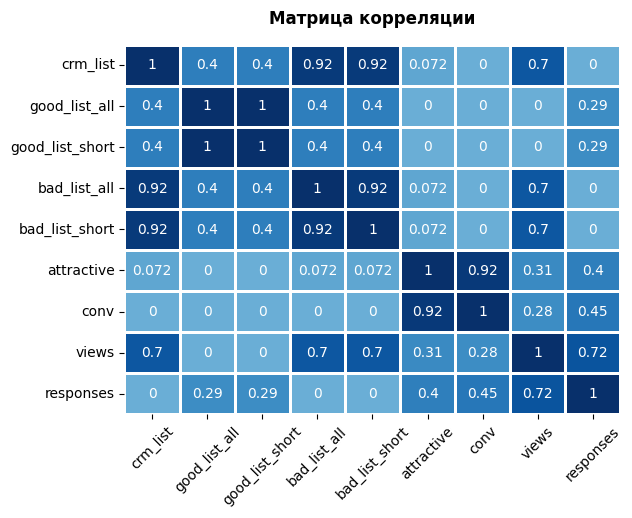

In [113]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['crm_list', 'bad_list_new', 'good_list_all', 'good_list_short', 'bad_list_all', 'bad_list_short','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


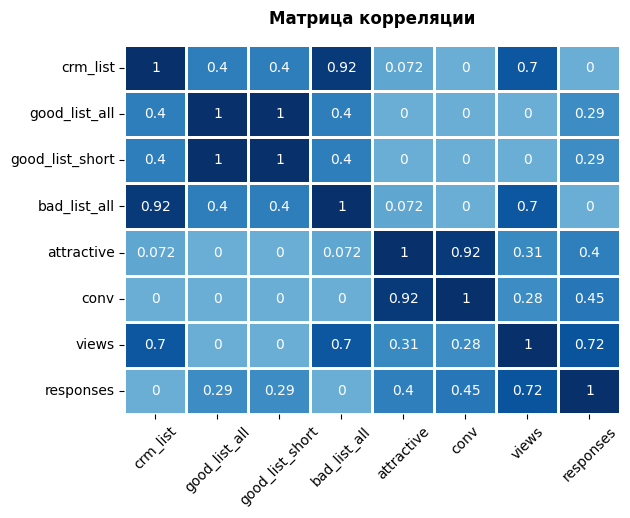

In [114]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['crm_list', 'good_list_all', 'good_list_short', 'bad_list_all', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

####Гипотезы 6 Формат работы (удаленка, офис...

Отдельно из списка выделим признак "удаленка, офис и гибрид", как в гипотезах

In [115]:
columns_contains(df_hy, 'удаленка', 'format', 'Удаленка', 19)

In [116]:
columns_contains(df_hy, 'гибрид', 'format', 'Гибрид', 20)

In [117]:
columns_contains(df_hy, 'офис', 'format', 'Офис', 21)

In [118]:
df_hy['удаленка'].value_counts()

True     88
False    59
Name: удаленка, dtype: int64

In [119]:
df_hy['офис'].value_counts()

False    83
True     64
Name: офис, dtype: int64

In [120]:
df_hy['гибрид'].value_counts()

False    89
True     58
Name: гибрид, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


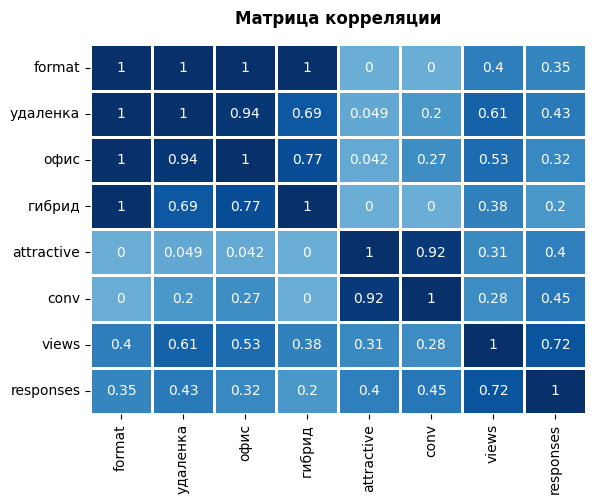

In [121]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['format', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.show();

Можно наблюдать тенденции влияния формата работы, но не сильные

####Гипотеза об уровне английского языка (Номер 5.1-

In [122]:
english_any = ['английск', 'english']

In [123]:
df_hy['english_any'] = df_hy['language'].str.contains('|'.join(english_any), na=False)
df_hy.insert(20, 'english_any', df_hy.pop('english_any'))


In [124]:
df_hy['english_any'].unique().tolist()

[True, False]

In [125]:
english_low = ['A1', 'A2','begginer', 'elementary', 'pre-intermediate', 'intermediate','B1']

In [126]:
df_hy['english_low'] = df_hy['language'].str.contains('|'.join(english_low), na=False)
df_hy.insert(21, 'english_low', df_hy.pop('english_low'))


In [127]:
df_hy['english_low'].unique().tolist()

[False, True]

In [128]:
english_high = ['C1', 'C2','advanced', 'upper-intermediate', 'intermediate','B2']

In [129]:
df_hy['english_high'] = df_hy['language'].str.contains('|'.join(english_high), na=False)
df_hy.insert(22, 'english_high', df_hy.pop('english_high'))


In [130]:
df_hy['english_high'].unique().tolist()

[True, False]

interval columns not set, guessing: ['conv', 'views', 'responses']


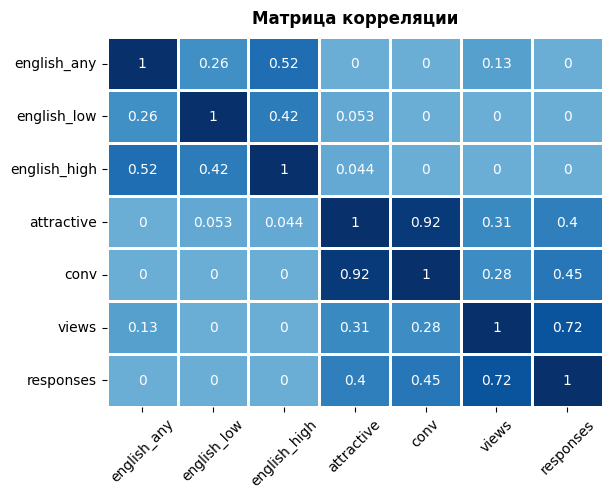

In [131]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['english_any', 'english_low', 'english_high', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=45)
plt.show();

####Гипотеза 9: зарплата

interval columns not set, guessing: ['salary_min', 'salary_max', 'conv', 'views', 'responses']


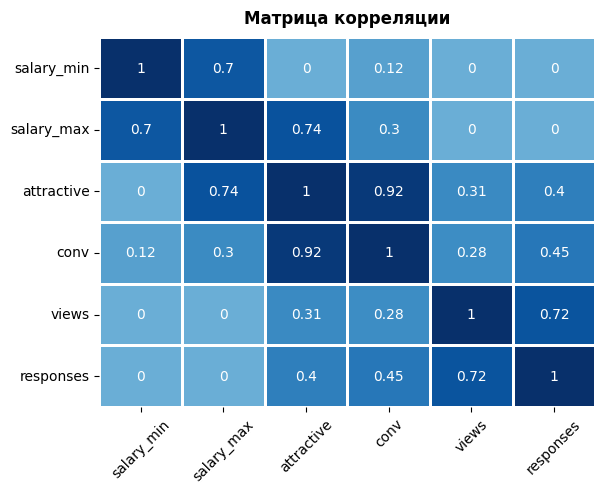

In [132]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['salary_min', 'salary_max', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=45)
plt.show();

In [133]:
print ('значениея минимальной заработной платы:', df_hy['salary_min'].unique())
print(df_hy.groupby('salary_min')['salary_min'].count())
print('количество пропусков', df_hy['salary_min'].isna().sum())


значениея минимальной заработной платы: [   nan 50000. 95000. 40000. 80000. 70000. 20000. 30000. 35000. 60000.
 42000. 25000. 90000. 10000. 15000. 28000. 39000.]
salary_min
10000.0     1
15000.0     1
20000.0     7
25000.0     1
28000.0     1
30000.0    15
35000.0     2
39000.0     1
40000.0    18
42000.0     1
50000.0     6
60000.0     9
70000.0     1
80000.0     3
90000.0     1
95000.0     1
Name: salary_min, dtype: int64
количество пропусков 78


In [134]:
print ('значениея максимальной заработной платы:', df_hy['salary_max'].unique())
print(df_hy.groupby('salary_max')['salary_max'].count())
print('количество пропусков', df_hy['salary_max'].isna().sum())


значениея максимальной заработной платы: [    nan  95000.  80000. 160000.  50000.  70000. 100000.  25000.  42000.
  30000.  40000.  60000.  65000.  45000. 140000.  55000. 150000.  47000.
  84000. 110000.]
salary_max
25000.0      2
30000.0      2
40000.0      4
42000.0      1
45000.0      1
47000.0      1
50000.0     10
55000.0      1
60000.0      7
65000.0      1
70000.0      7
80000.0      8
84000.0      1
95000.0      1
100000.0     6
110000.0     1
140000.0     2
150000.0     1
160000.0     1
Name: salary_max, dtype: int64
количество пропусков 89


In [135]:

print(df_hy.groupby('attractive')['salary_max'].median().round())
#print('количество пропусков', df_hy['salary_max'].isna().sum())


attractive
high      80000.0
low       50000.0
middle    60000.0
Name: salary_max, dtype: float64


In [136]:

df_hy.groupby('attractive')['salary_max'].mean().round()
#print('количество пропусков', df_hy['salary_max'].isna().sum())


attractive
high      81312.0
low       59100.0
middle    71364.0
Name: salary_max, dtype: float64

####Гипотезы 7 город

interval columns not set, guessing: ['conv', 'views', 'responses']


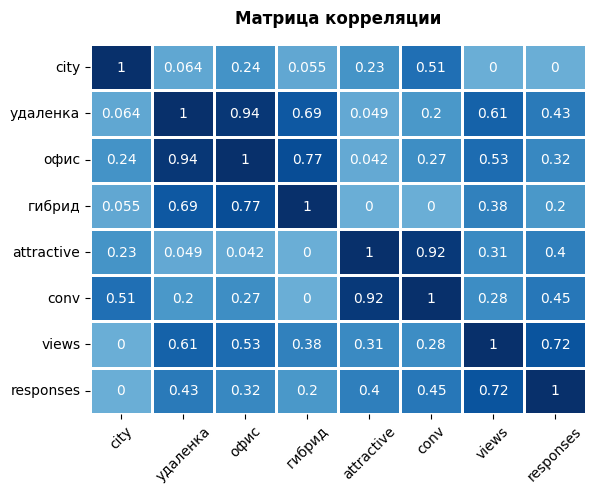

In [137]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['city', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

Намечается связь города с конверсией и "сонаправленность" c офисом. Но какой же это город? Проверим города из гипотезы.

In [138]:
columns_contains(df_hy, 'москва', 'city', 'Москва', 10)

In [139]:
df_hy['москва'].value_counts()

True     99
False    48
Name: москва, dtype: int64

In [140]:
columns_contains(df_hy, 'петербург', 'city', 'Санкт-Петербург', 11)

In [141]:
df_hy['петербург'].value_counts()

False    123
True      24
Name: петербург, dtype: int64

In [142]:
columns_contains(df_hy, 'екатеринбург', 'city', 'Екатеринбург', 12)

In [143]:
df_hy['екатеринбург'].value_counts()

False    141
True       6
Name: екатеринбург, dtype: int64

In [144]:
columns_contains(df_hy, 'нижний', 'city', 'Нижний Новгород', 13)

In [145]:
df_hy['нижний'].value_counts()

False    146
True       1
Name: нижний, dtype: int64

In [146]:
columns_contains(df_hy, 'казань', 'city', 'Казань', 14)

In [147]:
df_hy['казань'].value_counts()

False    139
True       8
Name: казань, dtype: int64

In [148]:
columns_contains(df_hy, 'воронеж', 'city', 'Воронеж', 15)

In [149]:
df_hy['воронеж'].value_counts()

False    144
True       3
Name: воронеж, dtype: int64

In [150]:
columns_contains(df_hy, 'волгоград', 'city', 'Волгоград', 16)

In [151]:
df_hy['волгоград'].value_counts()

False    146
True       1
Name: волгоград, dtype: int64

In [152]:
columns_contains(df_hy, 'тюмень', 'city', 'Тюмень', 17)

In [153]:
df_hy['тюмень'].value_counts()

False    143
True       4
Name: тюмень, dtype: int64

In [154]:
# columns_contains(df_hy, 'удаленка', 'city', 'Удаленка', 18)

In [155]:
# .value_counts()

interval columns not set, guessing: ['conv', 'views', 'responses']


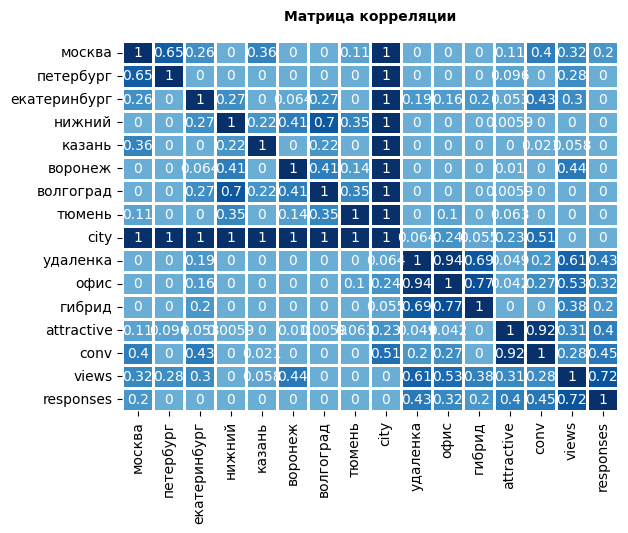

In [156]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['москва', 'петербург', 'екатеринбург', 'нижний', 'казань', 'воронеж', 'волгоград', 'тюмень', 'city', 'удаленка', 'офис', 'гибрид', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=10, fontweight='bold', pad=15)
plt.xticks(rotation=90)
plt.show();

Наблюдаются слабые признаки влияния городов "Москва" и "Екатеринбург"

#### Гипотеза 10: образование

interval columns not set, guessing: ['conv', 'views', 'responses']


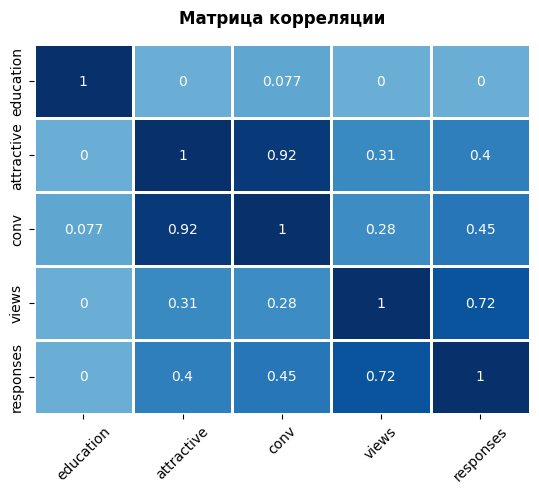

In [157]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['education', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [158]:
df_hy['education'].value_counts()

Другое, Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)    143
Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)              4
Name: education, dtype: int64

####Гипотеза 8: формат оформления (контракт)

interval columns not set, guessing: ['conv', 'views', 'responses']


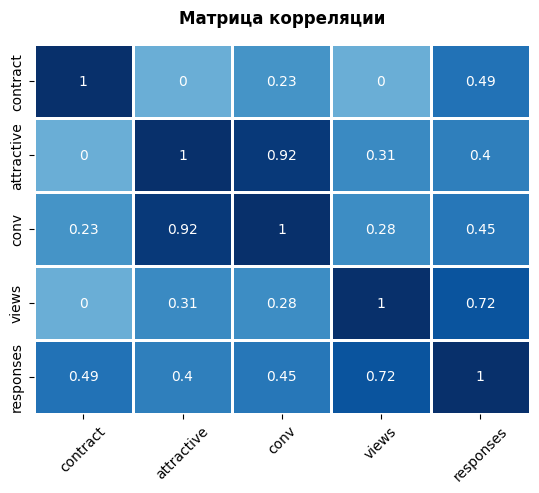

In [159]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['contract', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [160]:
df_hy['contract'].value_counts()

ИП, ГПХ, Самозанятость, Контракт, Трудовой договор    52
Трудовой договор                                      34
Самозанятость                                         14
Самозанятость, ИП                                      7
Контракт                                               6
Самозанятость, ИП, Трудовой договор                    4
Самозанятость, Трудовой договор                        4
Трудовой договор, ГПХ                                  4
ГПХ                                                    4
Самозанятость, Контракт, ИП, ГПХ                       3
Самозанятость, ИП, ГПХ                                 3
Самозанятость, Трудовой договор, ГПХ                   2
Контракт, Трудовой договор                             2
Самозанятость, ГПХ                                     2
Самозанятость, ИП, Трудовой договор, ГПХ               2
ИП, ГПХ                                                1
Контракт, ГПХ                                          1
Самозанятость, Контракт, Трудов

In [161]:
columns_contains(df_hy, 'Трудовой_договор', 'contract', 'Трудовой договор', 18)

In [162]:
columns_contains(df_hy, 'Самозанятость', 'contract', 'Самозанятость', 19)


In [163]:
df_hy['Самозанятость'].value_counts()


True     95
False    52
Name: Самозанятость, dtype: int64

In [164]:
columns_contains(df_hy, 'ИП', 'contract', 'ИП', 20)


In [165]:
columns_contains(df_hy, 'ГПХ', 'contract', 'ГПХ', 21)


In [166]:
columns_contains(df_hy, 'Контракт', 'contract', 'Контракт', 22)


In [167]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['contract', 'Трудовой_договор','ИП','Самозанятость', 'ГПХ', 'Контракт','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


####Гипотезы 11: занятость

In [168]:
df_hy['employment'].value_counts()

Полная                                                    109
Проектная, Частичная                                        9
Волонтерство, Проектная, Частичная, Стажировка, Полная      7
Стажировка                                                  5
Частичная                                                   4
Частичная, Полная                                           2
Стажировка, Полная                                          2
Стажировка, Волонтерство, Частичная                         1
Стажировка, Волонтерство, Проектная                         1
Стажировка, Волонтерство, Проектная, Частичная              1
Стажировка, Проектная, Полная                               1
Проектная, Частичная, Полная                                1
Стажировка, Волонтерство                                    1
Проектная                                                   1
Стажировка, Проектная, Частичная                            1
Стажировка, Частичная                                       1
Name: em

interval columns not set, guessing: ['conv', 'views', 'responses']


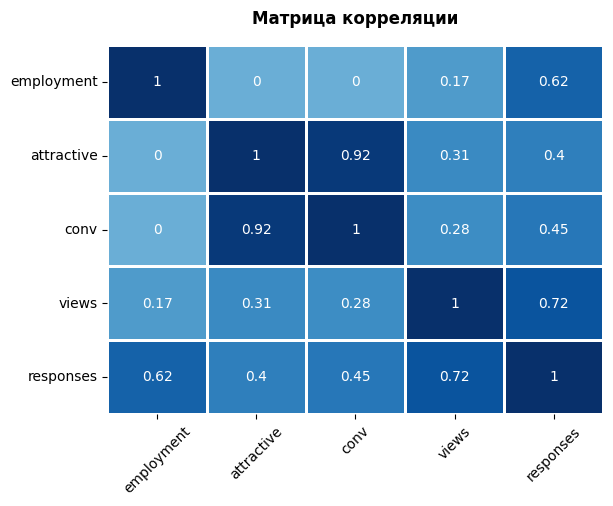

In [169]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['employment', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [170]:

columns_contains(df_hy, 'Полная', 'employment', 'Полная', 20)
df_hy['Полная'].value_counts()

True     122
False     25
Name: Полная, dtype: int64

In [171]:
columns_contains(df_hy, 'Проектная', 'employment', 'Проектная', 20)
df_hy['Проектная'].value_counts()

False    125
True      22
Name: Проектная, dtype: int64

In [172]:
columns_contains(df_hy, 'Частичная', 'employment', 'Частичная', 20)
df_hy['Частичная'].value_counts()


False    120
True      27
Name: Частичная, dtype: int64

In [173]:
columns_contains(df_hy, 'Волонтерство', 'employment', 'Волонтерство', 20)
df_hy['Волонтерство'].value_counts()

False    136
True      11
Name: Волонтерство, dtype: int64

In [174]:
columns_contains(df_hy, 'Стажировка', 'employment', 'Стажировка', 20)
df_hy['Стажировка'].value_counts()


False    126
True      21
Name: Стажировка, dtype: int64

In [175]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['employment', 'Полная', 'Проектная', 'Частичная', 'Стажировка', 'Волонтерство','attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


####Гипотезы 12: прототипирование и дизайн

In [176]:
proto_best = [ 'ui/ux', 'референс', 'referеnce']

In [177]:
df_hy['proto_best'] = df_hy['language'].str.contains('|'.join(proto_best), na=False)
df_hy.insert(10, 'proto_best', df_hy.pop('proto_best'))


In [178]:
df_hy['proto_best'].value_counts()

False    147
Name: proto_best, dtype: int64

In [181]:
proto_bad = [ 'smm', 'реклам', 'маркет']

In [182]:
df_hy['proto_bad'] = df_hy['language'].str.contains('|'.join(proto_bad), na=False)
df_hy.insert(10, 'proto_bad', df_hy.pop('proto_bad'))


In [184]:
df_hy['proto_bad'].value_counts()

False    121
True      26
Name: proto_bad, dtype: int64

In [185]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['proto_bad', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


####Гипотезы 13: менторство, наставник

In [186]:
mentor = [ 'mentor', 'настав', 'ментор']

In [187]:
df_hy['mentor'] = df_hy['language'].str.contains('|'.join(mentor), na=False)
df_hy.insert(10, 'mentor', df_hy.pop('mentor'))


In [188]:
df_hy['mentor'].value_counts()

False    124
True      23
Name: mentor, dtype: int64

In [189]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['mentor', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


####Гипотеза 14: некоммерческий опыт

In [190]:
nonprofit = [ 'не коммерч', 'некоммерч']

In [191]:
df_hy['nonprofit'] = df_hy['language'].str.contains('|'.join(nonprofit), na=False)
df_hy.insert(10, 'nonprofit', df_hy.pop('nonprofit'))


In [192]:
df_hy['nonprofit'].value_counts()

False    142
True       5
Name: nonprofit, dtype: int64

In [193]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['nonprofit', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

interval columns not set, guessing: ['conv', 'views', 'responses']


####Гипотеза 15: опыт, категории

In [194]:
df_hy['experience'].value_counts()

Около-релевантный (Pet-проекты, open-source, волонтёрские проекты), Релевантный (опыт работы, стажировки, командные проекты), Есть только учебный опыт в Практикуме    131
Около-релевантный (Pet-проекты, open-source, волонтёрские проекты), Релевантный (опыт работы, стажировки, командные проекты)                                            12
Релевантный (опыт работы, стажировки, командные проекты)                                                                                                                 4
Name: experience, dtype: int64

interval columns not set, guessing: ['conv', 'views', 'responses']


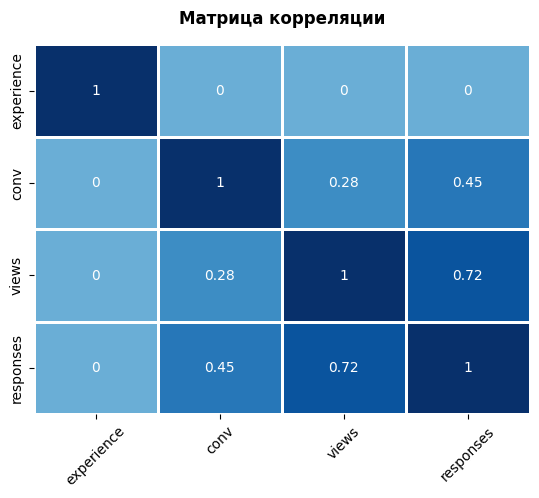

In [195]:
# Построим heatmap для изучение корреляции
sns.heatmap(df_hy[['experience', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

##NLP методы

---



###"Мешок слов"

Для начала попробуем применить сравнительно простые и быстро работающие NLP методы. "Мешок слов" - упрощенное представление текста, в котором важно только количество (частота присутствия) слов, но их порядок в предложениях не может быть учтен. В качестве инструмента визуализации будем использовать Wordcloud.

In [196]:
dv=df_pm.copy() #делаем отдельную копию датасета для работы с этим разделом

In [197]:
print(dv.isna().sum())

id                   0
status               0
lead_source          2
manager              4
start_date           0
end_date             9
views                0
responses            0
emp_brand            0
job_title            0
courses              0
salary_min          78
salary_max          89
city                 0
contract             0
format               0
experience           0
education            0
test_task          133
employment           0
mandatory            0
additional           0
comр_stages          0
work_conditions      0
conv                 0
job_cat              0
attractive           0
language             0
dtype: int64


####Функции для предварительной обработки текста (Text preprocessing)

In [198]:
# Загрузка стоп-слов (убираются высокочастотные слова, не несущие специфичного смысла)
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
morph = MorphAnalyzer() # морфологический анализатор для русского языка, написанный на языке Python

In [200]:
# Функция для лемматизации слов - слова заменяются на основную словоформу
def lemmatize_words(text, morph):
    words = word_tokenize(text)
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmatized_words)

При рассмотрении текстов после лемматизации были обнаружены лишние токены (например _x000В_), поэтому добавляется дополнительная функция обработки текста с помощью регулярных выражений.

In [201]:
# set regular expressions for text preprocessing
HTML = r'<.*?>' # html tags
COMMENTS = r'[\(\[][A-Za-z ]+[\)\]]' # comments in parentheses
LETTERS = r'[^\w\s]+[а-яА-Я]' #any letter
SPACES = r'([ ])\1+' # repeated spaces
DOTS = r'[\.]+' # punctuation mark ellipsis
SYMB = r"[^\w\d'\s]" # punctuation marks other than apostrophe

In [202]:

def dataset_clean(x, nan_value= None):
    for column in x:
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [203]:
# Создадим функцию для построения облака слов
def function_worldcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [204]:
# Инициализация стоп-слов
stop_words = set(stopwords.words('russian'))

# Добавление собственных вариантов к списку стоп-слов
custom_stop_words = set(['работа', 'работать'])

# Объединение стандартных и собственных стоп-слов
stop_words = stop_words.union(custom_stop_words)

# Инициализация лемматизатора и морфологического анализатора
morph = pymorphy2.MorphAnalyzer()
lemmatizer = WordNetLemmatizer()

# Функция для токенизации, лемматизации и удаления стоп-слов
def tokenize_lemmatize_and_filter(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(morph.parse(token)[0].normal_form) for token in tokens]
    return [token for token in lemmatized_tokens if token.lower() not in stop_words and token.isalpha()]

# Функция для создания и отображения облака слов
def WC(text):
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return plt.show()

In [205]:
def get_words_dict(words): #функция словаря
    words_dict = dict()

    for word in words:
        if word in words_dict:
            words_dict[word] = words_dict[word] + 1
        else:
            words_dict[word] = 1
    return words_dict

Влияние текстового описания условий работы (признак "work_conditions") на конверсию просмотров в отклики (признак "conv")

####Уникальные признаки популярных и не популярных текстов

Сначала проверим идею, могут ли быть уникальные признаки - слова (токены) которые есть только в объявлениях с высокой или низкой конверсией. Попробуем найти слова - триггеры, влияющие на уровень отклика.

In [206]:
dv['language'] = dv['mandatory']+dv['work_conditions']+dv['job_title']+dv['additional']
#столбец "additional" сюда не включен, тк. в нем слишком много пропусков и это проблема

In [ ]:
drrr=dv.copy()
drrr

In [208]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(drrr['language'].tolist())
all_text = all_text.lower()

# Токенизация, лемматизация и фильтрация стоп-слов для всего текста
all_tokens = tokenize_lemmatize_and_filter(all_text)

# Объединение токенов для создания облака слов
text_for_wordcloud = ' '.join(all_tokens)

WC(text_for_wordcloud)

In [209]:
text_high_popularity = ''.join(drrr.query('attractive == "high"')['language'])
# function_worldcloud(text_high_popularity)

In [210]:
text_low_popularity = ''.join(drrr.query('attractive == "low"')['language'])
# function_worldcloud(text_low_popularity)

In [211]:
all_text = ''.join(drrr['language'].tolist())

In [212]:
all_text

'Разговорный английский язык - уверенный B2 и выше,_x000D_\nОпыт работы менеджером проектов: можно почти без опыта или после курсов, мы всему научим_x000D_\nПонимание процессов работы с мобильными приложениями_x000D_\nПонимание работы продуктовой компании_x000D_\nУмение четко ставить цели и фокусироваться на результате работы_x000D_\nСпособность мотивировать команду_x000D_\nПриветствуется постоянное стремление к повышению уровня в менеджменте проектовТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x000D_\nКорпоративный английский_x000D_\nСвоевременные выплаты заработной платы_x000D_\nГрафик 5/2 с 8:50 до 18:00 по МСКjunior project managerБудет плюсом:_x000D_\nОпыт работы с проектами в Xcode_x000D_\nОпыт заливки проектов в приложении Store Connect_x000D_\nУмение работать в Figma_x000D_\nПонимание, как вести проекты в Jira_x000D_\nРазработка ТЗ- Системность, структурность, четкость. Нужен четкий контроль команды и ведение всех документов / таблиц. (работаем в Google Doc, Notion, Asana, вирту

In [213]:
good_words=[]
commom_words=[]
bad_words=[]
for word in all_text:
    if (word in text_high_popularity and word in text_low_popularity):
        commom_words.append(word),
    if word in text_high_popularity and word not in text_low_popularity:
        good_words.append(word),
    if word not in text_high_popularity and word in text_low_popularity:
        bad_words.append(word)

In [214]:
mistik_good =''.join(good_words)

In [215]:
mistik_bad =''.join(bad_words)

In [216]:
display(mistik_good)

'\u200b\u200bVV?\u200bZ\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Z\xa0\xa0\xa0\xa0\xa0\xa0•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t•\t?VV\xa0\xa0\xa0\xa0\xa0\xa0\xa0→→→→→→→→→→→→Z→→→\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200b\u200bZ?\u200b→→→?V••••••\t•\t•\t•\t•\t•\t••V'

In [217]:
display(mistik_bad)

'̆̆̆$\u200dz😇…Ш₽'

In [218]:
bad_words

['̆', '̆', '̆', '$', '\u200d', 'z', '😇', '…', 'Ш', '₽']

In [219]:
common=''.join(commom_words)

In [220]:
common

'Разговорный английский язык - уверенный B2 и выше,_x000D_\nОпыт работы менеджером проектов: можно почти без опыта или после курсов, мы всему научим_x000D_\nПонимание процессов работы с мобильными приложениями_x000D_\nПонимание работы продуктовой компании_x000D_\nУмение четко ставить цели и фокусироваться на результате работы_x000D_\nСпособность мотивировать команду_x000D_\nПриветствуется постоянное стремление к повышению уровня в менеджменте проектовТОЛКО ОФИСНАЯ ЗАНЯТОСТ В МОСКВЕ _x000D_\n_x000D_\nКорпоративный английский_x000D_\nСвоевременные выплаты заработной платы_x000D_\nГрафик 5/2 с 8:50 до 18:00 по МСКjunior project managerБудет плюсом:_x000D_\nОпыт работы с проектами в Xcode_x000D_\nОпыт заливки проектов в приложении Store Connect_x000D_\nУмение работать в Figma_x000D_\nПонимание, как вести проекты в Jira_x000D_\nРазработка ТЗ- Системность, структурность, четкость. Нужен четкий контроль команды и ведение всех документов / таблиц. (работаем в Google Doc, Notion, Asana, виртуал

**Выводы** уникальных слов, которые могут быть только в объявлениях с высокой или низкой конверсией, не обнаружено. Зато выявлены другие символы: эмодзи, знаки маркировки текста. В принципе, это даже можно интерпретировать.

**Словари** для привлекательных вакансий

In [221]:
# def get_words(text):
# #     with open(filename, encoding="utf8") as file:
# #         text = file.read()
#     text = text.replace("\n", " ")
#     text = text.replace(",", "").replace(".", "").replace("?", "").replace("!", "")
#     text = text.lower()
#     words = text.split()
#     #words = tokenize_lemmatize_and_filter(words)
#     #all_tokens = tokenize_lemmatize_and_filter(all_text)
#     words.sort()
#     return words

In [222]:
# words = get_words(text_high_popularity)

In [223]:
words = tokenize_lemmatize_and_filter(text_high_popularity)

In [224]:

words_dict = get_words_dict(words)
print(f"Кол-во слов: {len(words)}")
print(f"Кол-во уникальных слов: {len(words_dict)}")
print("Все использованные слова:")
for word in words_dict:
    print(word.ljust(20), words_dict[word])


Кол-во слов: 3203
Кол-во уникальных слов: 1181
Все использованные слова:
наличие              2
высокий              17
образование          7
уверенный            4
владение             6
m                    5
office               4
знание               27
figma                6
miro                 5
soft                 5
skill                8
проактивный          1
бояться              3
новый                8
умение               36
быстро               8
перестроиться        1
режим                7
многозадачность      5
аналитический        6
навык                19
критический          3
мышление             5
подготовка           2
офис                 33
москва               9
проспект             2
мир                  3
оформление           19
тк                   16
гражданин            1
рф                   14
искать               1
специалист           1
который              18
готовый              13
вникнуть             1
специфика            2
задача              

In [225]:
#good_vocab = pd.DataFrame.from_dict(words_dict, orient='index')
good_vocab = pd.DataFrame.from_dict(words_dict, orient='index', dtype=None)

# вывод DataFrame
print(good_vocab)

              0
наличие       2
высокий      17
образование   7
уверенный     4
владение      6
...          ..
ходить        1
посещение     1
объект        1
ярославль     1
managerить    1

[1181 rows x 1 columns]


In [226]:
good_vocab


0
наличие       2
высокий      17
образование   7
уверенный     4
владение      6
...          ..
ходить        1
посещение     1
объект        1
ярославль     1
managerить    1

[1181 rows x 1 columns]

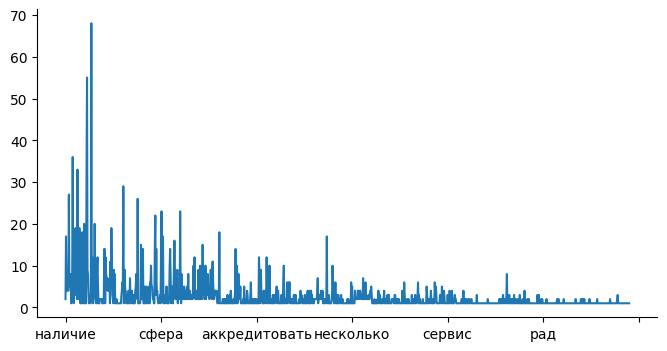

In [227]:


from matplotlib import pyplot as plt
good_vocab[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

In [228]:
good_vocab.value_counts().plot()

<Axes: xlabel='0'>

**Зако́н Ци́пфа** - дальшейшую работу с по анализу текстов можно проводить, убрав из рассмотрения самые частые и самые редкие слова.

#### 1. Влияние текстового описания условий работы на отклики

Облака слов для вакансий с хорошей и плохой конверсией очень похожи. Попробуем аналогично предыдущему примеру снять слой из самых высокочастотных токенов и посмотреть что под ним.

In [229]:
print(dv['work_conditions'].head(10))

6     ТОЛЬКО ОФИСНАЯ ЗАНЯТОСТЬ В МОСКВЕ _x000D_\n_x0...
8     Друзья, на эту позицию вместо себя ищет кандид...
12    — Возможность развития в российском и междунар...
26    100% офис _x000D_\nМосква (Проспект Мира)_x000...
33    - 100% удаленка - быть на связи по московскому...
36    - 100% удаленка _x000D_\n- Испытательный срок ...
51    - 100% офис; _x000D_\n- г. Санкт-Петербург, ул...
78    - Оклад + премия по результатам работы (годово...
80    - г.Москва, ст.м. Дмитровская, ул. Складочная ...
88    В июле 2022 на партнёрскую вакансию в эту комп...
Name: work_conditions, dtype: object


In [230]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['work_conditions'] = dv['work_conditions'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['work_conditions'] = dv['work_conditions'].apply(lambda x: lemmatize_words(x, morph))


In [231]:
print(dv['work_conditions'].head(10))

6     офисный занятость москва _x000d_ _x000d_ корпо...
8     друг , позиция вместо искать кандидат выпускни...
12    — возможность развитие российский международны...
26    100 % офис _x000d_ москва ( проспект мир ) _x0...
33    - 100 % удалёнка - связь московский времени_x0...
36    - 100 % удалёнка _x000d_ - испытательный срок ...
51    - 100 % офис ; _x000d_ - г. санкт-петербург , ...
78    - оклад + премия результат работа ( годовой бо...
80    - г.москва , ст.м . дмитровский , ул . складоч...
88    июль 2022 партнёрский вакансия компания выйти ...
Name: work_conditions, dtype: object


In [232]:
dv['work_conditions'] = dv['work_conditions'].apply(dataset_clean)

In [233]:
print(dv['work_conditions'].head(10))

6     офисный занятость москва корпоративный английс...
8     друг , позиция вместо искать кандидат выпускни...
12    — возможность развитие российский международны...
26    100 % офис москва ( проспект мир ) фул-тайм оф...
33    - 100 % удалёнка - связь московский времени - ...
36    - 100 % удалёнка - испытательный срок 3 проект...
51    - 100 % офис ; - г. санкт-петербург , ул . мар...
78    - оклад + премия результат работа ( годовой бо...
80    - г.москва , ст.м . дмитровский , ул . складоч...
88    июль 2022 партнёрский вакансия компания выйти ...
Name: work_conditions, dtype: object


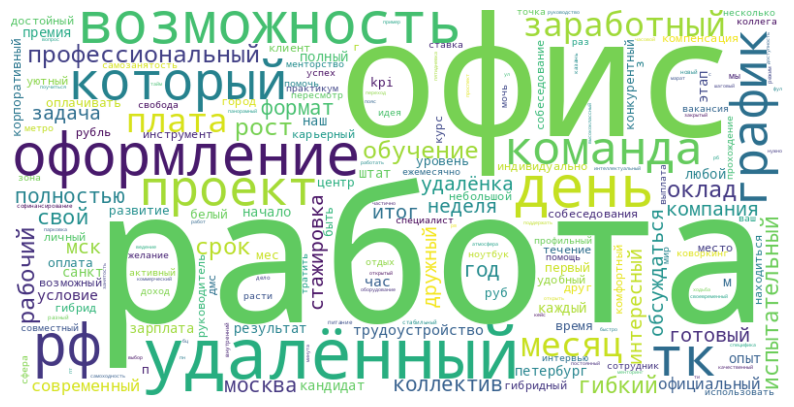

In [234]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['work_conditions'])
function_worldcloud(text_high_popularity)

In [235]:
text_high_popularity

"100 % офис москва ( проспект мир ) фул-тайм оформление тк ( только гражданин рф ) искать специалист , который готовый быстро вникнуть специфика задача . самоходность - готовый `` водить рука '' долго . команда проект , который нужно дружный готовый помочь , ответить вопрос делиться материал работа . - 100 % офис ; - г. санкт-петербург , ул . марат , 82 ( бц `` марат 82 '' ) 7-й минута ходьба станция метро “ звенигородский ” / “ пушкинский ” - заработный плата задержка 2 раз месяц ( обсуждаться каждый кандидат индивидуально ) ; - официальный трудоустройство тк рф ; - комфортный условие труд гибкий начало рабочий время ; - качественный оборудование бесперебойный работа ; - коллектив , который поддержать помочь ; компания организовывать friday party интеллектуальный конкурс встреча мастер-класс приятный приз радостный атмосфера . июль 2022 партнёрский вакансия компания выйти выпускница практикум - ux/ui дизайнер. условие работа : конкурентный з/п итог собеседования пн.-пт . 10 19 ( возмо

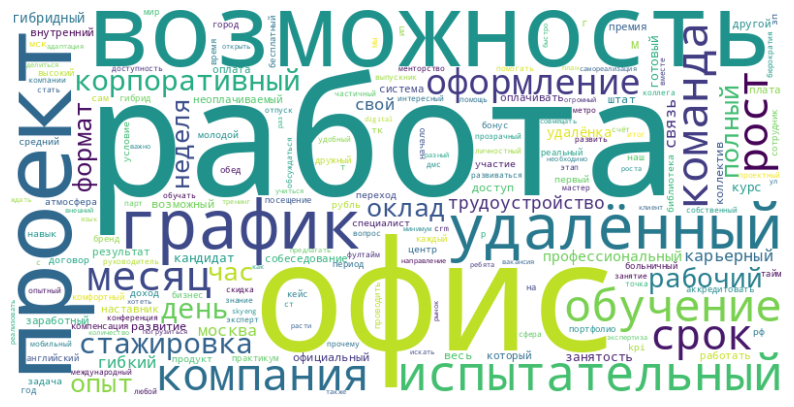

In [236]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['work_conditions'])
function_worldcloud(text_low_popularity)

Выводы: никаких очевидных различий в словаре описаний условий работы не наблюдается. Попробуем убрать несколько самых высокочастотных слов (тематические признаки), может быть отличия будут более наглядные.

In [237]:

def dataset_postclean1(x, nan_value= None):
    for column in x:
  # subs = subs[1:] # remove the first promotional subtitle
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('работа', '', txt) # 'www' change to an empty string
        txt = re.sub('удаленный', '', txt) # 'www' change to an empty string
        txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        txt = re.sub('офис', '', txt) # 'www' change to an empty string
        txt = re.sub('день', '', txt) # 'www' change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        txt = re.sub('удалённый', '', txt) # 'www' change to an empty string
        txt = re.sub('команда', '', txt) # 'www' change to an empty string
        txt = re.sub('возможность', '', txt) # 'www' change to an empty string
        txt = re.sub('компания', '', txt) # 'www' change to an empty string
        #txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [238]:
dv['work_conditions'] = dv['work_conditions'].apply(dataset_postclean1)

In [239]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['work_conditions'])
function_worldcloud(text_high_popularity)

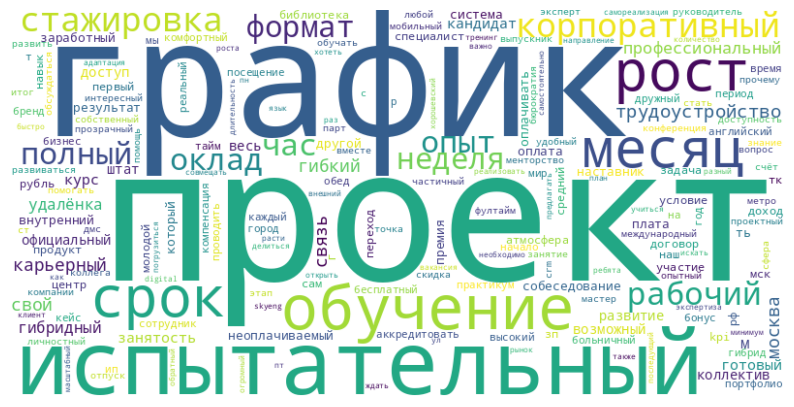

In [240]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['work_conditions'])
function_worldcloud(text_low_popularity)

Полезные находки: **"ТК РФ"**- в словаре описаний условий работы с хорошей конверсией, **проект, график** - для низкой конверсии

#### 2. Влияние текстового описания всех параметров вакансии на отклики

Попробуем объединить все текстовые данные объявления, и помотреть, есть будут ли в этом случае различия в зависимости от высокой/низкой конверсии

In [241]:
dv['language']

6       Разговорный английский язык - уверенный B2 и в...
8       - Системность, структурность, четкость. Нужен ...
12      — Заряд энергии и организаторские способности:...
26      Наличие высшего образования _x000D_\nУверенное...
33      Hard skills:_x000D_\n- Знание Trello_x000D_\n-...
                              ...                        
1215    — Внимательность и системность; _x000D_\n— Жел...
1232    Иметь представление об используемых на проекте...
1269    Образование высшее техническое/ИТ/финансы_x000...
1275    — Минимально разбираться в технической части (...
1290    Понимание процессов разработки и git flow; _x0...
Name: language, Length: 147, dtype: object

In [242]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['language'] = dv['language'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['language'] = dv['language'].apply(lambda x: lemmatize_words(x, morph))


In [243]:
dv['language'] = dv['language'].apply(dataset_clean)

In [244]:
dv['language']

6       разговорный английский язык - уверенный b2 выш...
8       - системность , структурность , чёткость . нуж...
12      — заряд энергия организаторский способность : ...
26      наличие высокий образование уверенный владение...
33      hard skills : - знание trello - уверенный влад...
                              ...                        
1215    — внимательность системность ; — желание разви...
1232    иметь представление использовать проект технол...
1269    образование высокий техническое/ит/финансы опы...
1275    — минимально разбираться технический часть ( ж...
1290    понимание процесс разработка git flow ; знание...
Name: language, Length: 147, dtype: object

In [245]:

def dataset_postclean2(x, nan_value= None):
    for column in x:
  # subs = subs[1:] # remove the first promotional subtitle
        txt = re.sub(HTML, ' ', x) # html tags change to spaces
        #txt = re.sub(COMMENTS, ' ', txt) # comments in parentheses change to spaces
        #txt = re.sub(LETTERS, ' ', txt) # anything that isn't a letter is a space
        txt = re.sub(DOTS, r'.', txt) # punctuation mark ellipsis change to dots
        txt = re.sub(SPACES, r'\1', txt) # repeated spaces change to one space
        #txt = re.sub(SYMB, '', txt) # punctuation marks other than apostrophe change to an empty string
        txt = re.sub('работа', '', txt) # 'www' change to an empty string
        txt = re.sub('знание', '', txt) # 'www' change to an empty string
        txt = re.sub('работать', '', txt) # 'www' change to an empty string
        txt = re.sub('умение', '', txt) # 'www' change to an empty string
        txt = re.sub('опыт', '', txt) # 'www' change to an empty string
        txt = re.sub('_x000d_', '', txt) # 'www' change to an empty string
        txt = re.sub('ть', '', txt) # 'www' change to an empty string
        txt = re.sub('команда', '', txt) # 'www' change to an empty string
        txt = re.sub('возможнос', '', txt) # 'www' change to an empty string
        txt = re.sub('проект', '', txt) # 'www' change to an empty string
        txt = re.sub('офис', '', txt) # 'www' change to an empty string
        txt = re.sub('понимание', '', txt) # 'www' change to an empty string
        txt = re.sub('оформление', '', txt) # 'www' change to an empty string
        txt = re.sub('удалённый', '', txt) # 'www' change to an empty string
        txt = re.sub('день', '', txt) # 'www' change to an empty string
        #txt = txt.lstrip().rstrip().replace("\n","") # left space trimming
        #txt = txt.encode('ascii', 'ignore').decode() # remove all non-ascii characters
        #txt = txt.lower() # to lowercase
        txt = ' '.join(txt.split())
    return txt

In [246]:
dv['language'] = dv['language'].apply(dataset_postclean2)

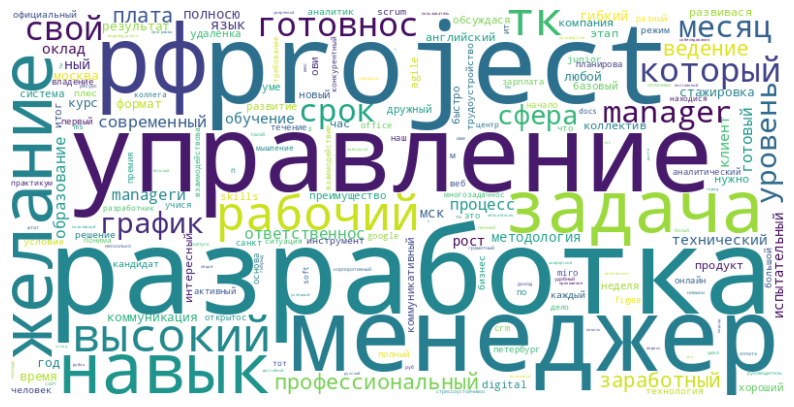

In [247]:
text_high_popularity = ' '.join(dv.query('attractive == "high"')['language'])
function_worldcloud(text_high_popularity)

In [248]:
text_high_popularity

"наличие высокий образование уверенный владение ms office figma , miro soft skills : - проактивный - бояся новый задач - быстро перестроися режим многозадачнос - высокий аналитический навык критический мышление , - навык подготовка презентаций100 % москва ( проспект мир ) фул-тайм тк ( только гражданин рф ) иска специалист , который готовый быстро вникну специфика задача . самоходнос - готовый `` води рука '' долго . , который нужно дружный готовый помочь , ответи вопрос делися материал работы.project managerжелательный бизнес-аналитик , интерес it-технология наличие технический высокий образование преимущество hard skills : - уверенный владение ms office google docs soft skills : - желание расти развивася - коммуникабельнос исполнительнос - перевести желание просьба клиент технический язык разработчик - структурирова информация , сформулирова тот задание- 100 % ; - г. санкт-петербург , ул . марат , 82 ( бц `` марат 82 '' ) 7-й минута ходьба станция метро “ звенигородский ” / “ пушкинс

In [249]:
text_low_popularity = ' '.join(dv.query('attractive == "low"')['language'])
function_worldcloud(text_low_popularity)

In [250]:
text_low_popularity

"- системнос , структурнос , чёткос . нужный чёткий контроль ведение документ / таблица . ( google doc , notion , asana , виртуальный telegram ) - выстраивание пу клиент - автоворонки - креатив , сторителинг , прогрев – сильный сторона - пообеща – сдела , задержива , опаздыва предупрежда форс-мажор стави новый срокдруг , позиция вместо иска кандидат выпускник практикум . первый этап собеседование . отбор тестовый задание. вакансия откры кандидат - рф другой страна ( снг , турция , etc . ) необходимо связь рабочий время мск ( 10:00 - 19:00 примерно ) . график гибкий , определённый время необходимо связь выходи созвон встречи совмеща другой вряд получися , хоте реализова свой навык один - велкома ! ) 50 000р фикс + kpi испытательный срока договор ( как самозанятый ип ) компания прожект выпускник практикум ) project-manager- плюс запуск онлайн-школа ( от 1 год ) - также интересный предыдущий продюсер , маркетолог , баера сейлз сфера , требовася постановка чёткий тз проверка : ) — заряд эн

На этом слое уже наблюдаются некоторые отличия. **управление, разработка** - высокая конверсия, **график, навык** - низкая конверсия.

#### 3. Влияние текста заголовка на "кликабельность"

Попробуем применить метод к простым кратким текстам - заголовкам. Здесь выберем другую метрику - категории популярности, по различию в количестве просмотров ("views").

##### Показатели частоты просмотров

In [251]:
print('показатели "кликабельности" в этой группе вакансий')
print("очень низкий уровень: менее ",dv['views'].quantile(1/4).round())
print("низкий уровень: oт ",dv['views'].quantile(1/4).round(), "до", dv['views'].quantile(1/3).round())
print("ниже среднего: oт ",dv['views'].quantile(1/3).round(), "до", dv['views'].quantile(1/2).round())
print("средний уровень: oт ",dv['views'].quantile(1/2).round(), "до", dv['views'].mean().round())
print("выше среднего: oт ",dv['views'].mean().round(), "до", dv['views'].quantile(2/3).round())
print("высокий: oт ",dv['views'].quantile(2/3).round(), "до", dv['views'].quantile(3/4).round())
print("очень высокий: более ",dv['views'].quantile(3/4).round())

показатели "кликабельности" в этой группе вакансий
очень низкий уровень: менее  23.0
низкий уровень: oт  23.0 до 27.0
ниже среднего: oт  27.0 до 37.0
средний уровень: oт  37.0 до 42.0
выше среднего: oт  42.0 до 49.0
высокий: oт  49.0 до 54.0
очень высокий: более  54.0


In [252]:
 #Определение квантилей для разбиения на категории
low_quantile = dv['views'].quantile(1/3)
high_quantile = dv['views'].quantile(2/3)

display(low_quantile)
high_quantile

27.0

49.0

In [253]:
def categorize_popularity(views):
    # Определение категории популярности
    if views <= low_quantile:
        return "low"
    elif views <= high_quantile:
        return "middle"
    else:
        return "high"

# Применение функции к столбцу "Количество просмотров" и создание нового столбца с категориями популярности
dv['clicable'] = dv['views'].apply(categorize_popularity)

In [254]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                             project manager (junior)
1232                                      project manager
1269    руководитель направления развитие транзакционн...
1275                                      project manager
1290                    стажировка для project менеджеров
Name: job_title, Length: 147, dtype: object

In [255]:
# Обработка текста: удаление стоп-слов и лемматизация
dv['job_title'] = dv['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
dv['job_title'] = dv['job_title'].apply(lambda x: lemmatize_words(x, morph))


In [256]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                           project manager ( junior )
1232                                      project manager
1269    руководитель направление развитие транзакционн...
1275                                      project manager
1290                          стажировка project менеджер
Name: job_title, Length: 147, dtype: object

In [257]:
dv['job_title']=dv['job_title'].apply(dataset_clean)

In [258]:
dv['job_title']

6                                  junior project manager
8                                         project-manager
12                                            pr-менеджер
26                                        project manager
33                                        project manager
                              ...                        
1215                           project manager ( junior )
1232                                      project manager
1269    руководитель направление развитие транзакционн...
1275                                      project manager
1290                          стажировка project менеджер
Name: job_title, Length: 147, dtype: object

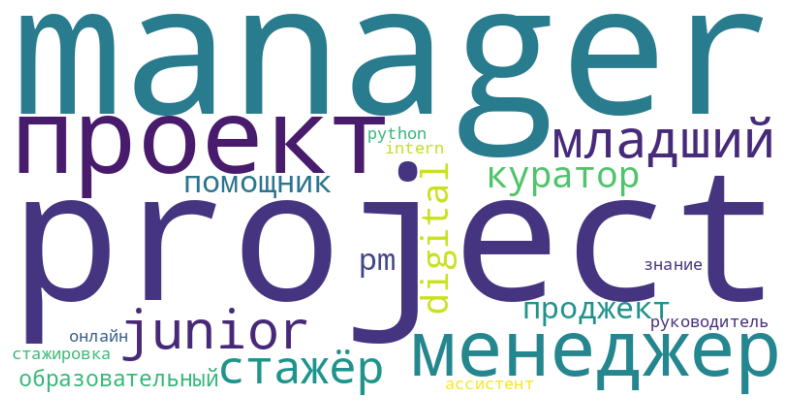

In [259]:
text_high_popularity = ' '.join(dv.query('clicable == "high"')['job_title'])
function_worldcloud(text_high_popularity)

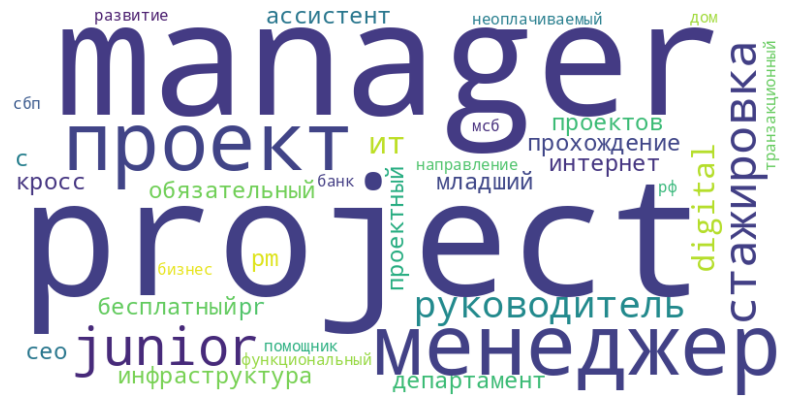

In [260]:
text_low_popularity = ' '.join(dv.query('clicable == "low"')['job_title'])
function_worldcloud(text_low_popularity)

**Результат**: особых различий нет

**Общий вывод** по влиянию текста на конверсию с точки зрения возможностей данного метода ("мешок слов"): отдельные моменты иллюстрирует хорошо, но в целом этот метод не учитывает связей между словами в словаре, поэтому для тематически близких описаний требует много коррекции.

##Самые успешные вакансии

Попробуем выявить и подробно изучить самые успешные вакансии: высокий уровень просмотров, высокий уровень отклика после просмотров.

In [261]:
top_views = dv[dv['clicable'] == 'high']

In [262]:
top_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 8 to 1162
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               48 non-null     int64  
 1   status           48 non-null     object 
 2   lead_source      48 non-null     object 
 3   manager          47 non-null     object 
 4   start_date       48 non-null     object 
 5   end_date         45 non-null     object 
 6   views            48 non-null     int64  
 7   responses        48 non-null     int64  
 8   emp_brand        48 non-null     object 
 9   job_title        48 non-null     object 
 10  courses          48 non-null     object 
 11  salary_min       23 non-null     float64
 12  salary_max       21 non-null     float64
 13  city             48 non-null     object 
 14  contract         48 non-null     object 
 15  format           48 non-null     object 
 16  experience       48 non-null     object 
 17  education       

In [263]:
top_vac = top_views[top_views['attractive'] == 'high']

In [264]:
count_vac = top_views[top_views['attractive'] == 'low']

In [265]:
count_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 8 to 1049
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21 non-null     int64  
 1   status           21 non-null     object 
 2   lead_source      21 non-null     object 
 3   manager          20 non-null     object 
 4   start_date       21 non-null     object 
 5   end_date         19 non-null     object 
 6   views            21 non-null     int64  
 7   responses        21 non-null     int64  
 8   emp_brand        21 non-null     object 
 9   job_title        21 non-null     object 
 10  courses          21 non-null     object 
 11  salary_min       12 non-null     float64
 12  salary_max       10 non-null     float64
 13  city             21 non-null     object 
 14  contract         21 non-null     object 
 15  format           21 non-null     object 
 16  experience       21 non-null     object 
 17  education       

In [266]:
top_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 385 to 1162
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13 non-null     int64  
 1   status           13 non-null     object 
 2   lead_source      13 non-null     object 
 3   manager          13 non-null     object 
 4   start_date       13 non-null     object 
 5   end_date         13 non-null     object 
 6   views            13 non-null     int64  
 7   responses        13 non-null     int64  
 8   emp_brand        13 non-null     object 
 9   job_title        13 non-null     object 
 10  courses          13 non-null     object 
 11  salary_min       2 non-null      float64
 12  salary_max       2 non-null      float64
 13  city             13 non-null     object 
 14  contract         13 non-null     object 
 15  format           13 non-null     object 
 16  experience       13 non-null     object 
 17  education     

**Результат** самых успешных вакансий обнаружено 13 штук, посмотрим на них подробнее, для такого объема данных больше подойдет описательная статистика.

In [ ]:
top_vac.sample(13)

In [268]:
columns_contains(top_vac, 'Junior_tag', 'job_title', 'junior', 29)

####Гипотезы 1 о влиянии признаков наименований (Junior, Junior+ итд.)

---



In [269]:
#junior_list = [ 'младш','jun','джун','начинающ','джун']

In [270]:
top_vac['junior_list'] = top_vac['language'].str.contains('|'.join(junior_list), na=False)
top_vac.insert(10, 'junior_list', top_vac.pop('junior_list'))


In [271]:
# good_title =['project manager junior', 'cтажер project manager', 'помощник руководителя проекта','руководитель проекта', 'менеджер проекта', 'координатор проекта',
# 'менеджер it проектов', 'рroject manager middle']

In [272]:
top_vac['good_title'] = top_vac['language'].str.contains('|'.join(junior_list), na=False)
top_vac.insert(10, 'good_title', top_vac.pop('good_title'))


In [273]:
top_vac['good_title'].unique().tolist()

[False, True]

interval columns not set, guessing: ['conv', 'views', 'responses']


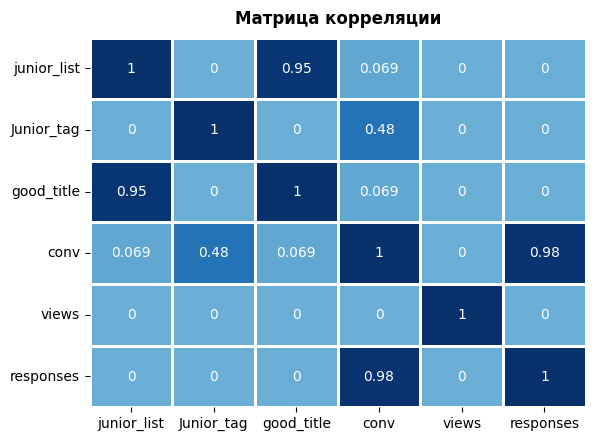

In [274]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['junior_list', 'Junior_tag', 'good_title', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

Только слабая связь признака "junior" в заголовке и конверсии

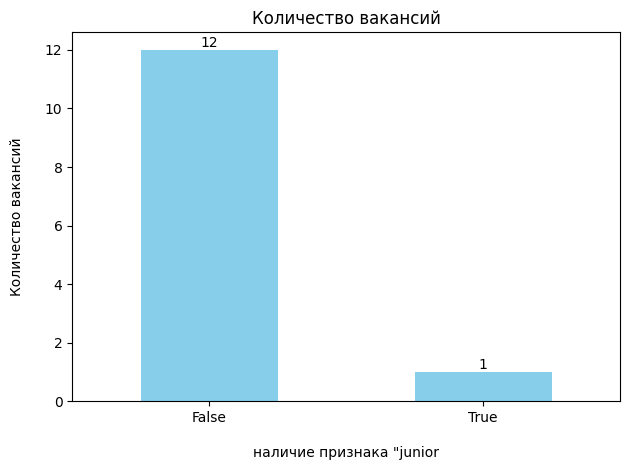

In [275]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['Junior_tag'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "junior', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [276]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['junior_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "junior', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

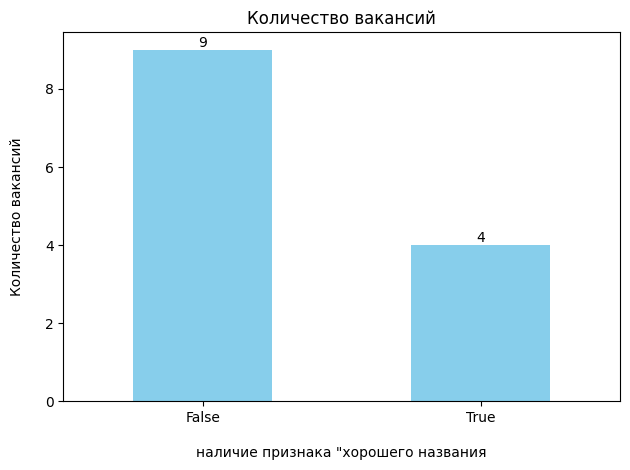

In [277]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['good_title'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "хорошего названия', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Выводы** Эта гипотеза не находит подтверждения

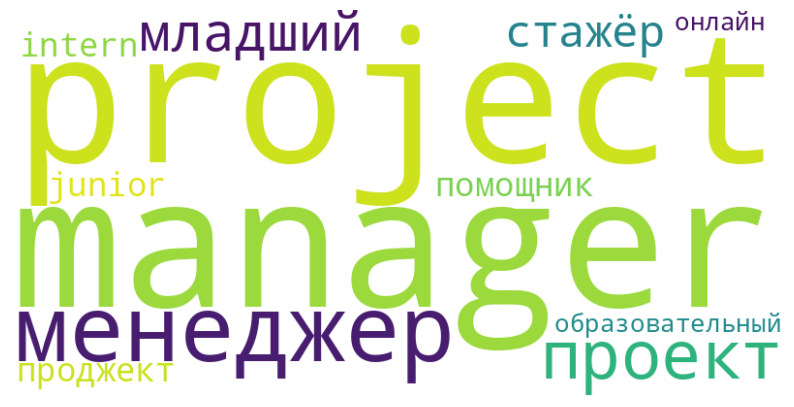

In [278]:
popularity = ' '.join(top_vac.query('clicable == "high"')['job_title'])
function_worldcloud(popularity)

Облако слов названий для лучших вакансий

#### Гипотеза 2 о признаке "стажировка"

In [279]:
# trainee_list = [ 'trainee','стажер','стажиров','практикант']

In [280]:
top_vac['trainee_tag'] = top_vac['job_title'].str.contains('|'.join(trainee_list), na=False)
top_vac.insert(12, 'trainee_tag', top_vac.pop('trainee_tag'))


In [281]:
top_vac['trainee_tag'].unique().tolist()

[False, True]

такого признака нет в названиях

In [282]:
top_vac['trainee_list'] = top_vac['language'].str.contains('|'.join(trainee_list), na=False)
top_vac.insert(13, 'trainee_list', top_vac.pop('trainee_list'))


In [283]:
top_vac['trainee_list'].unique().tolist()

[False, True]

но этот признак есть о общем тексте описания вакансии

interval columns not set, guessing: ['conv', 'views', 'responses']


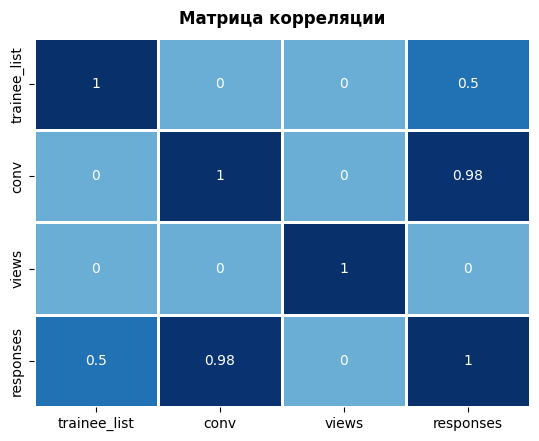

In [284]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['trainee_list', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=10)
plt.xticks(rotation=0)
plt.show();

In [285]:
# Случаи когда есть и когда нет junior в названии

features_counts = top_vac['trainee_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий')
plt.xlabel('наличие признака "стажировка', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Вывод** признак стажировки встречается в избранных вакансиях, но реже его нет. Видна слабая связь этого признака с количеством откликов (в сторону увеличения откликов). Но нулевая связь с конверсией.

####Гипотезы 7 Город

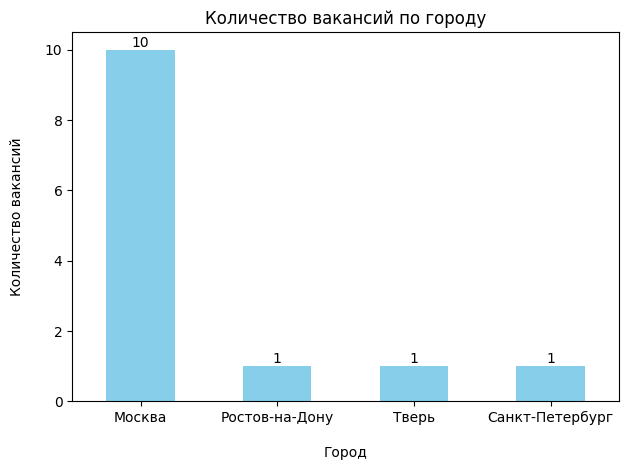

In [286]:
# Создадим график количества вакансий по городам из топа

features_counts = top_vac['city'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по городу')
plt.xlabel('Город', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 8 формат оформления

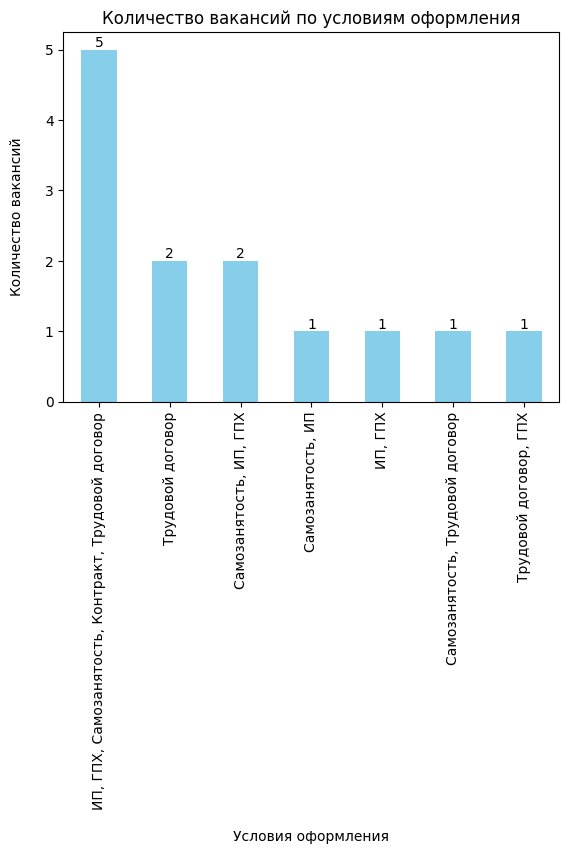

In [287]:
# Создадим график количества вакансий по условиям оформления из топа

features_counts = top_vac['contract'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по условиям оформления')
plt.xlabel('Условия оформления', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [288]:
columns_contains(top_vac, 'Трудовой_договор', 'contract', 'Трудовой договор', 18)

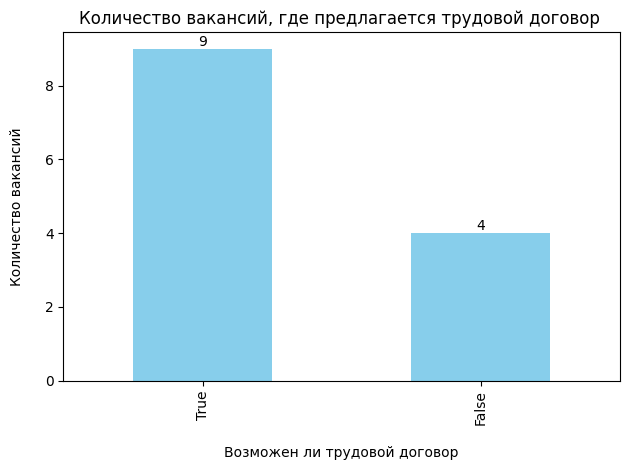

In [289]:
# Создадим график количества вакансий по условиям оформления из топа

features_counts = top_vac['Трудовой_договор'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий, где предлагается трудовой договор ')
plt.xlabel('Возможен ли трудовой договор', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезе 6: формат работы (удаленка, офис..)

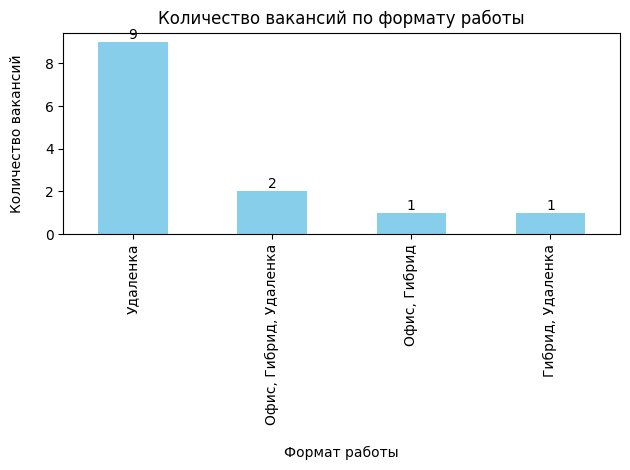

In [290]:
# Создадим график количества вакансий по формату работы

features_counts = top_vac['format'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество вакансий по формату работы')
plt.xlabel('Формат работы', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [291]:
columns_contains(top_vac, 'удаленка', 'format', 'Удаленка', 29)

In [292]:
# Проверим отдельно признака "удаленка"

features_counts = top_vac['удаленка'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Предлагается ли удаленка ')
plt.xlabel('возможна или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

В этой группе большинство вакансий предлагают удаленку.

####Гипотезы 4: Технологии, ПО

In [293]:
top_vac['bad_list_new'] = top_vac['language'].str.contains('|'.join(bad_list_new), na=False)
top_vac.insert(10, 'bad_list_new', top_vac.pop('bad_list_new'))


In [294]:
top_vac['good_list_short'] = top_vac['language'].str.contains('|'.join(good_list_short), na=False)
top_vac.insert(11, 'good_list_short', top_vac.pop('good_list_short'))


interval columns not set, guessing: ['conv', 'views', 'responses']


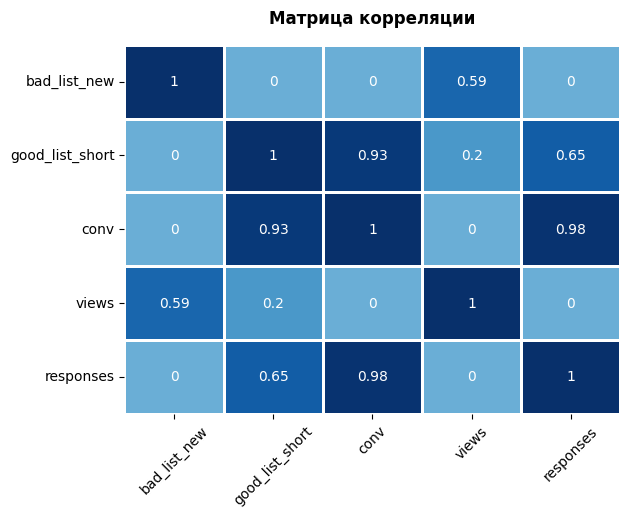

In [295]:
# Построим heatmap для изучение корреляции
sns.heatmap(top_vac[['bad_list_new', 'good_list_short', 'attractive', 'conv', 'views','responses']].phik_matrix(),
            annot=True, vmin=-1, vmax=1, center=0, cmap='Blues', linewidths=1, cbar=False)
plt.title('Матрица корреляции', fontsize=12, fontweight='bold', pad=15)
plt.xticks(rotation=45)
plt.show();

In [296]:
top_vac['bad_list_new']

385     False
403     False
580     False
656     False
671      True
875     False
925      True
937     False
954     False
981      True
1121    False
1137    False
1162    False
Name: bad_list_new, dtype: bool

In [297]:
print ('Присутствие в описании слов из не-хорошего списка:', top_vac['bad_list_new'].unique())
print(top_vac.groupby('bad_list_new')['bad_list_new'].count())



Присутствие в описании слов из не-хорошего списка: [False  True]
bad_list_new
False    10
True      3
Name: bad_list_new, dtype: int64


In [298]:
# Признаки слов из не-хорошего списка

features_counts = top_vac['bad_list_new'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев. когда в описании есть признаки из не-хорошего стека')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

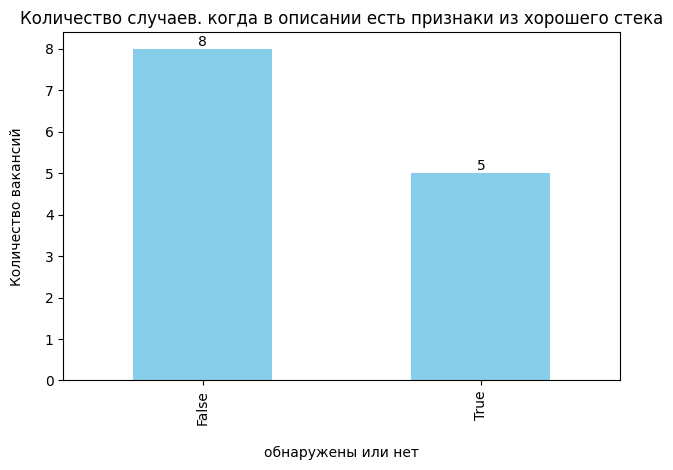

In [299]:
# Признаки слов из хорошего списка

features_counts = top_vac['good_list_short'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев. когда в описании есть признаки из хорошего стека')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотеза 9: Зарплата

In [300]:
features_counts = top_vac['salary_min'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('случаи указания минимальной заработной платы у лучших вакансий ')
plt.xlabel('уровень з/п', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

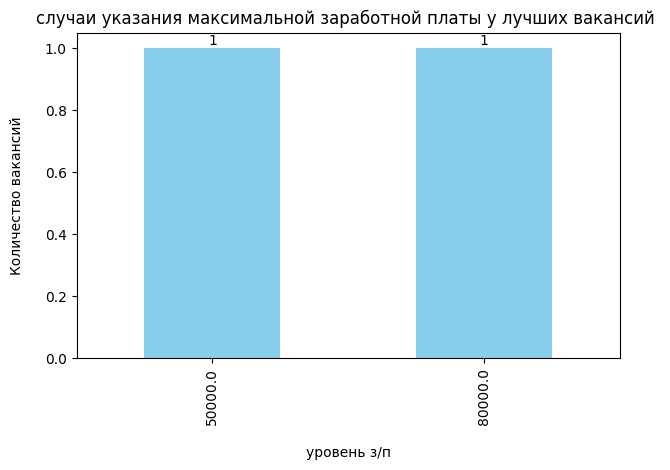

In [301]:
features_counts = top_vac['salary_max'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('случаи указания максимальной заработной платы у лучших вакансий ')
plt.xlabel('уровень з/п', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотеза 10: образование

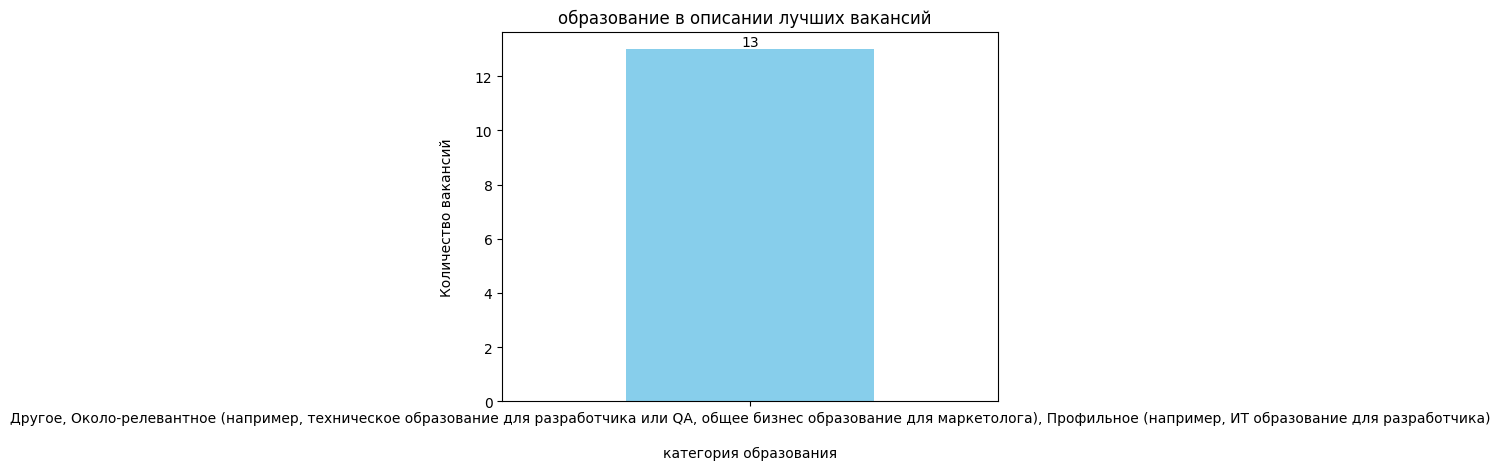

In [302]:
features_counts = top_vac['education'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('образование в описании лучших вакансий  ')
plt.xlabel('категория образования', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [303]:
top_vac['education'].unique()




array(['Другое, Около-релевантное (например, техническое образование для разработчика или QA, общее бизнес образование для маркетолога), Профильное (например, ИТ образование для разработчика)'],
      dtype=object)

####Гипотезы 3: Методология управления проектами

In [304]:
top_vac['agile_list'] = top_vac['language'].str.contains('|'.join(agile_list), na=False)
top_vac.insert(20, 'agile_list', top_vac.pop('agile_list'))


In [305]:
top_vac.groupby('agile_list')['agile_list'].count()

agile_list
False    8
True     5
Name: agile_list, dtype: int64

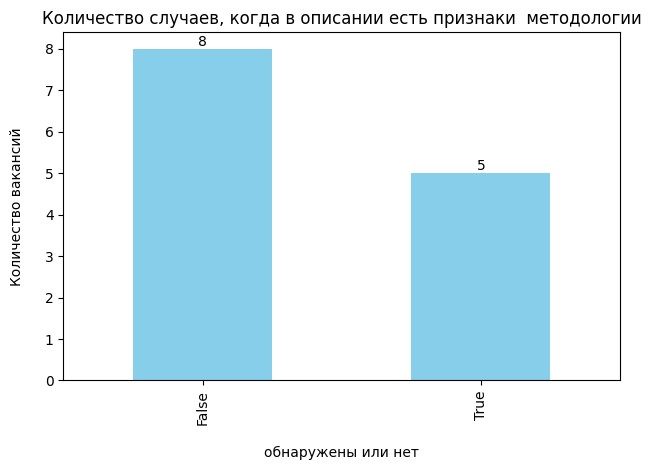

In [306]:
# Признаки

features_counts = top_vac['agile_list'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в описании есть признаки  методологии')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 4, технологии и ПО

In [307]:
top_vac['good_list_short'] = top_vac['language'].str.contains('|'.join(good_list_short), na=False)
top_vac.insert(18, 'good_list_short', top_vac.pop('good_list_short'))


In [308]:
# Признаки

features_counts = top_vac['good_list_short'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в вакансии технологии из хорошего списка')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотезы 5: английский язык

In [309]:
top_vac['english_any'] = top_vac['language'].str.contains('|'.join(english_any), na=False)
top_vac.insert(21, 'english_any', top_vac.pop('english_any'))


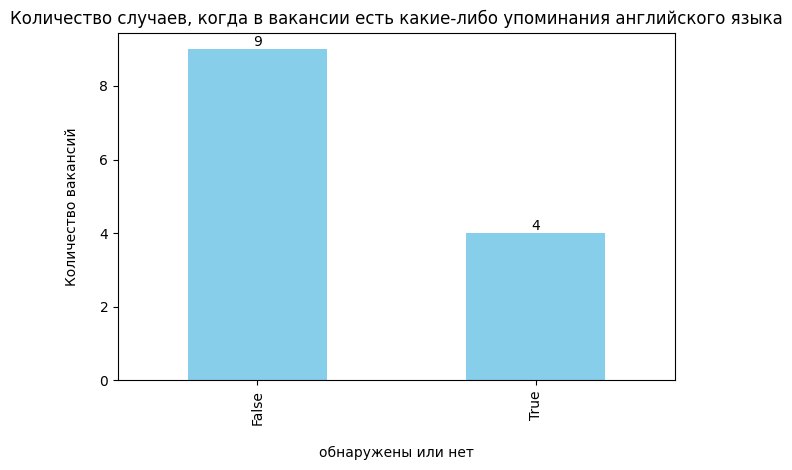

In [310]:
# Признаки

features_counts = top_vac['english_any'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Количество случаев, когда в вакансии есть какие-либо упоминания английского языка')
plt.xlabel('обнаружены или нет', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Гипотезы 11: формы занятости

In [311]:
# Признаки

features_counts = top_vac['employment'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Формы занятости ')
plt.xlabel('формы занятости', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=90)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Гипотеза 15: опыт категории

In [312]:
# Признаки

features_counts = top_vac['experience'].value_counts()
features_counts.plot(kind='bar', color='skyblue')

plt.title('Формы занятости ')
plt.xlabel('формы занятости', labelpad=15)
plt.ylabel('Количество вакансий', labelpad=15)

plt.xticks(rotation=0)
plt.gca().margins(x=2)

for i, val in enumerate(features_counts):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

####Условия работы у лучших вакансий (облако слов)

In [313]:
top_vac['work_conditions'] = top_vac['work_conditions'].apply(dataset_clean)

In [314]:
top_vac['work_conditions'] = top_vac['work_conditions'].apply(dataset_postclean1)

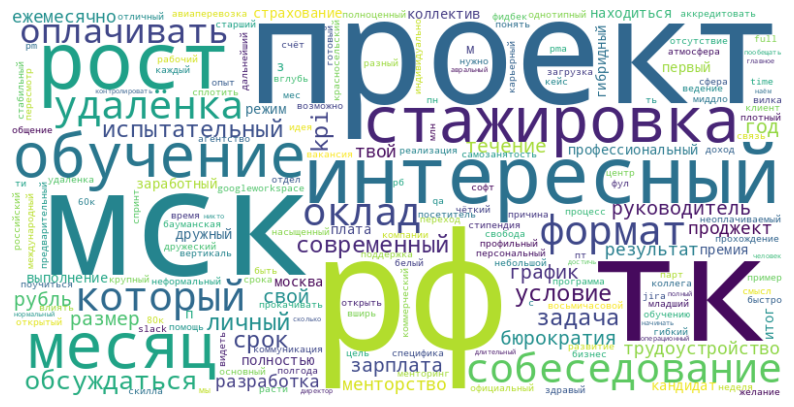

In [315]:
work_conditions = ' '.join(top_vac.query('clicable == "high"')['work_conditions'])
function_worldcloud(work_conditions)

####Все тексты описания лучших вакансий (облако слов)

In [316]:
top_vac['language'] = top_vac['language'].apply(dataset_clean)

In [317]:
top_vac['language'] = top_vac['language'].apply(dataset_postclean1)

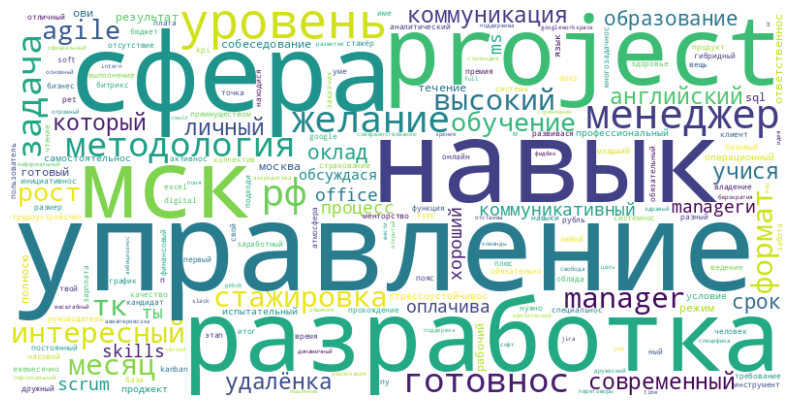

In [318]:
descr = ' '.join(top_vac.query('clicable == "high"')['language'])
function_worldcloud(descr)

#Итоги, выводы

##Итоги (кратко по списку из ТЗ)

— название должности/позиции  :  вероятнее латиницей без признаков Junior
— формат работы: вероятнее удаленка
— опыт : вероятнее  перечень из всех категорий (но мало других примеров в данных)
— образование: “Другое….” (но мало других примеров в данных)
— город :  вероятнее Москва
— з/п:  можно не указывать, но если есть верхняя граница, желательно от 80000 рублей
— формат оформления: вероятнее по ТК, но лучше “широкий ассортимент”
— занятость: вероятнее полная. Стажировки не исключаются, но больше данных за полную занятость.
— обязанности: вероятнее “управление разработкой…”
— условия работы: вероятнее часовой пояс МСК, ТК РФ, удаленка, ‘интересный проект…’, ‘карьерный рост…’
— требования: не подтвердилось влияние  требования по языку, agile и некоторые другие


###Примечания для Тимлида Ольги

Есть некоторые идеи, которые я пока не успела оформить


*   Оформить правильно хотя бы одну гипотезу со статистическими критериями

*   Проверить влияние длины списка в категориях: формат работы, формат оформления - есть предположение, что именно большой вариант выбора хорошо влияет на показатели, а не конкретный вариант.

*   Найти численные критерии отделения тематических слов и редких случайных (по закону Цифра) - эту идею я пока не включила в презентацию, ее теория - в части про NLP - тогда будут очень правильные словари для облака слов, отражающие именно специфику сравниваемых текстов.

*   В списке гиптез Екатерины есть несколько не охваченных. Отработанные я разметила цветом и копию файла пришлю. Нужно придумать, как зацепить не охваченные гипотезы.
*   Нужно придумать, как отделить случаи с оплачиваемой стажировкой от не опливаемой.
*  Орфорграфию в примечниях еще не проверяла.

